In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool
import yt
from yt import YTArray
import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
from mpl_toolkits.axes_grid1 import make_axes_locatable


/home/bego/anaconda3/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/bego/.config/yt/ytrc is deprecated in favor of /home/bego/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

In [3]:
def process_data_to_plot(data, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"])
    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T
    

In [4]:
def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    transparencia = 0.9
    tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,amplitude*seconds_to_Myr,vmin = vmin, vmax=vmax, cmap = "inferno")
  #  print(np.log10(amplitude*seconds_to_Myr))
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,amplitude*seconds_to_Myr,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    #lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=3, nbins=nbins)
    #im0 = ax[2*index,2].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    #im1 = ax[2*index+1,2].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    #ax[2*index,2].set_title(f"{etiqueta} Mode 3")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")
    for i in range(0,2):
        for j in range(0,2):
            ax[2*index + i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
        #Grillo
            ax[2*index+ i,j].axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
            
        #Mosquito
            ax[2*index+ i,j].axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    #plt.colorbar()


  #  plt.subplots_adjust(left=0 , bottom= 0.1, right=0.76, top=0.9, wspace=0.05, hspace= 0.05)
  #  plt.show()

In [5]:
density = pd.read_csv(path_results + f"fourier_22_None_disc.csv", sep = ",")
z = pd.read_csv(path_results + f"fourier_22_Z_disc.csv", sep = ",")
vz = pd.read_csv(path_results + f"fourier_22_VZ_disc.csv", sep = ",")
vr = pd.read_csv(path_results + f"fourier_22_Vr_disc.csv", sep = ",")
vphi = pd.read_csv(path_results + f"fourier_22_Vphi_disc.csv", sep = ",")


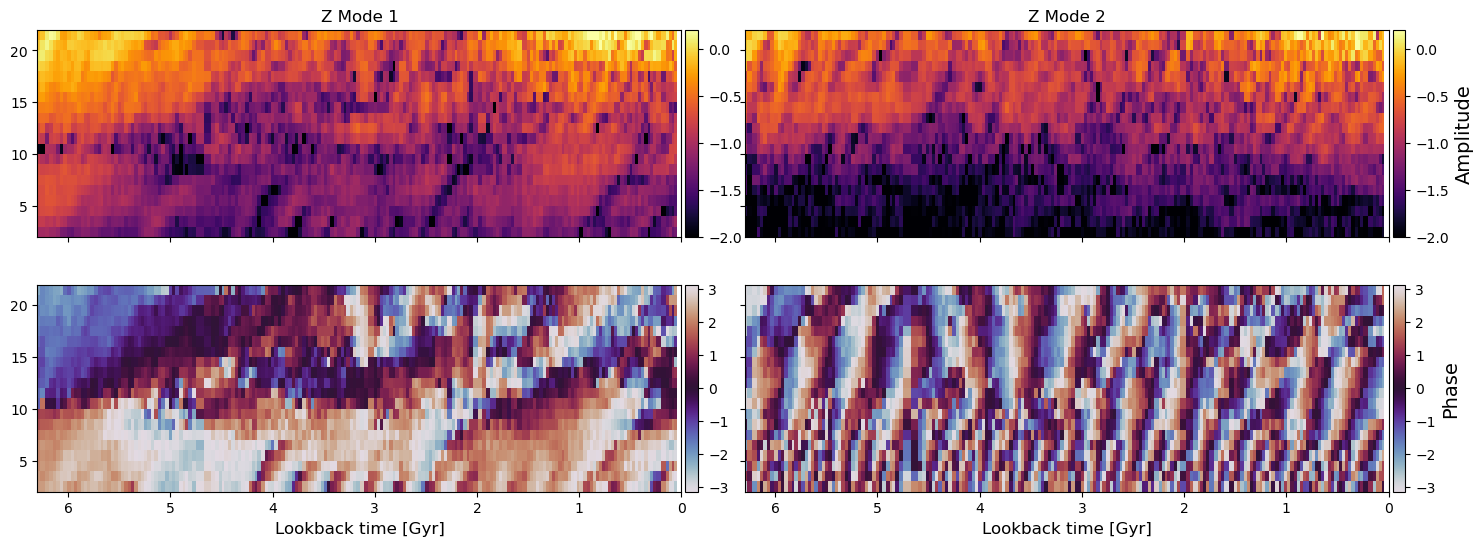

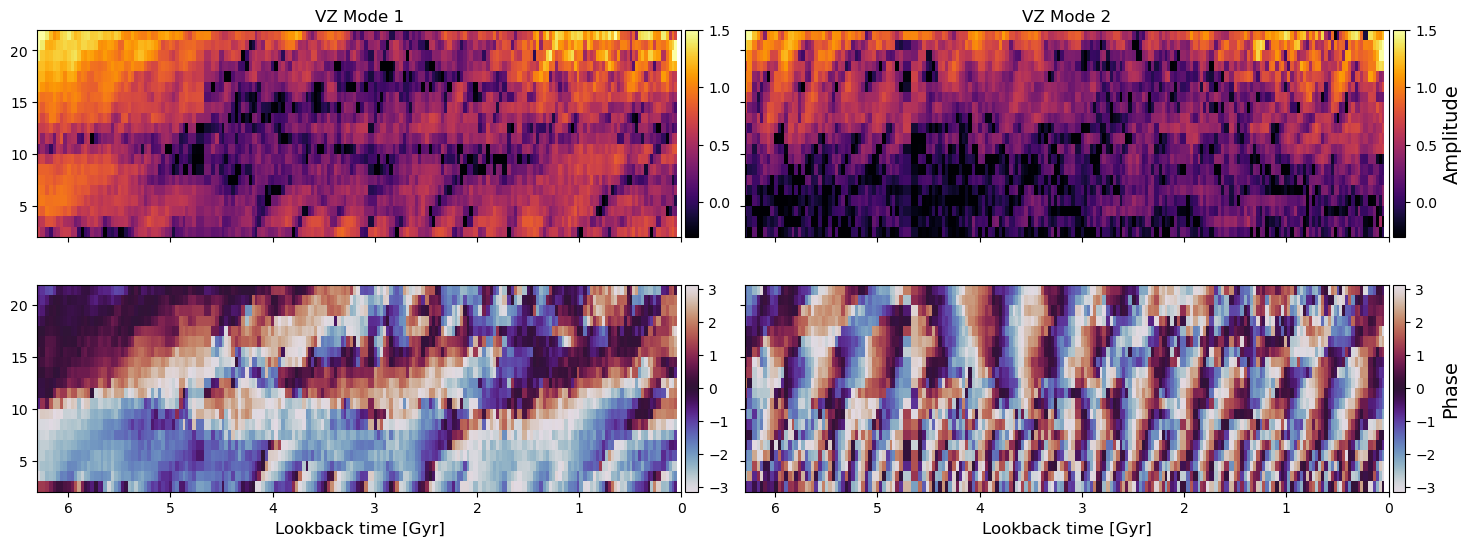

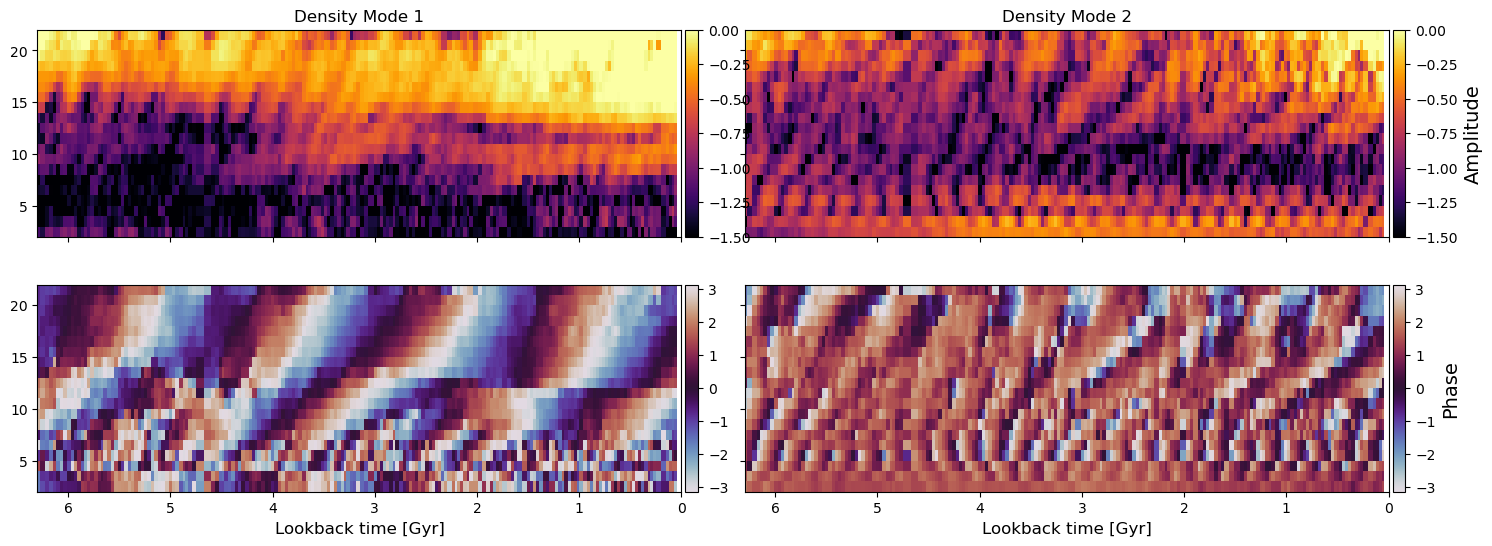

In [5]:
density = pd.read_csv(path_results + f"fourier_22_None_disc_5Gyr.csv", sep = ",")
z = pd.read_csv(path_results + f"fourier_22_Z_disc_5Gyr.csv", sep = ",")
vz = pd.read_csv(path_results + f"fourier_22_VZ_disc_5Gyr.csv", sep = ",")
vr = pd.read_csv(path_results + f"fourier_22_Vr_disc_5Gyr.csv", sep = ",")
vphi = pd.read_csv(path_results + f"fourier_22_Vphi_disc_5Gyr.csv", sep = ",")

def process_data_to_plot(data, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"])
    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T

def plot_fourierogram(data, etiqueta, vmin, vmax):
    transparencia = 0.9
    tamaño = 2
        #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    fig, ax = plt.subplots(nrows=2,ncols =2 , sharex = True,sharey = True,  figsize=(18,6))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=22)
    im0 = ax[0,0].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax =vmax, cmap = "inferno")
    im1 = ax[1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=22)
    im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax = vmax, cmap = "inferno")
    im11 = ax[1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,1].set_title(f"{etiqueta} Mode 2")

    plt.xlim(6.3,0)
    plt.ylim(2,22)
    divider = make_axes_locatable(ax[0,0])
    cax = divider.append_axes('right', size='2%', pad=0.04)
    cb = fig.colorbar(im0, cax=cax, orientation='vertical')
    #cb.set_label(label = "Amplitude",fontsize = 14)

    divider = make_axes_locatable(ax[0,1])
    cax = divider.append_axes('right', size='2%', pad=0.04)
    cb = fig.colorbar(im00, cax=cax, orientation='vertical')
    cb.set_label(label = "Amplitude",fontsize = 14)

    divider = make_axes_locatable(ax[1,0])
    cax = divider.append_axes('right', size='2%', pad=0.04)
    cb = fig.colorbar(im1, cax=cax, orientation='vertical')
    #cb.set_label(label = "Phase",fontsize = 14)

    divider = make_axes_locatable(ax[1,1])
    cax = divider.append_axes('right', size='2%', pad=0.04)
    cb = fig.colorbar(im11, cax=cax, orientation='vertical')
    cb.set_label(label = "Phase",fontsize = 14)

    plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.07, hspace= 0.23)
    transparencia = 0.9
    tamaño = 2
    ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
    ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
    #lt.show()
  #  plt.savefig(path_results +f"{etiqueta}_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
#    plt.shoW()
        #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))

plot_fourierogram(z, etiqueta="Z",vmin = -2, vmax = 0.2)
plot_fourierogram(vz, etiqueta="VZ",vmin = -0.3, vmax = 1.5)
plot_fourierogram(density, etiqueta="Density",vmin = -1.5, vmax = 0.)


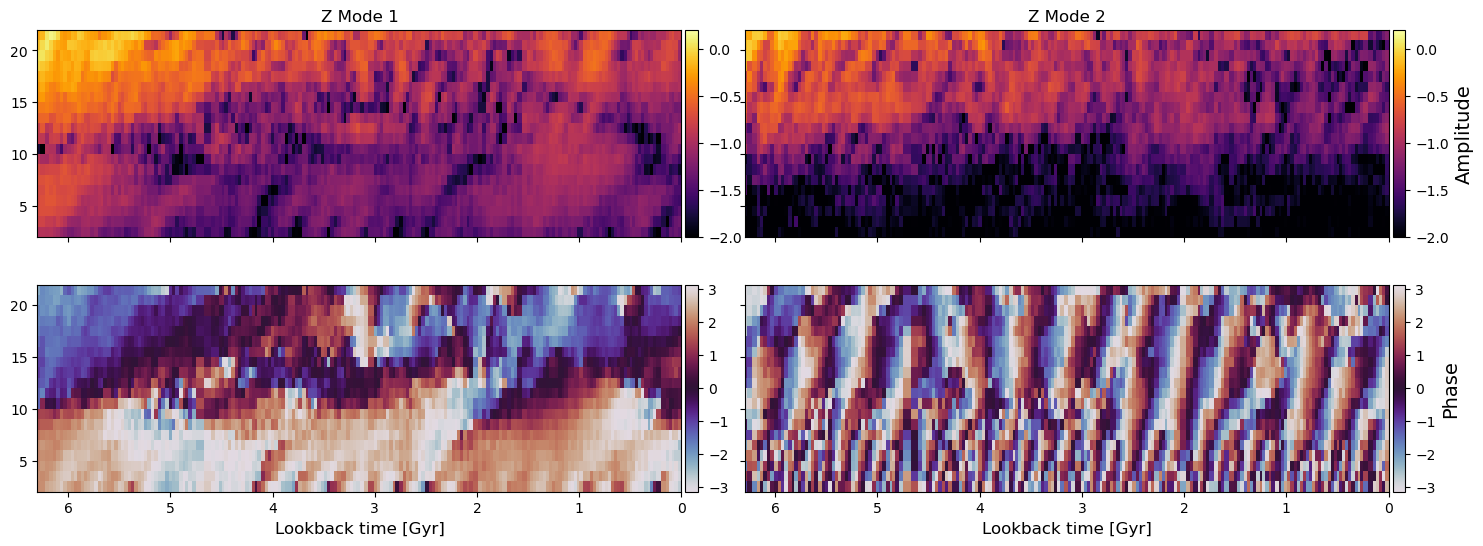

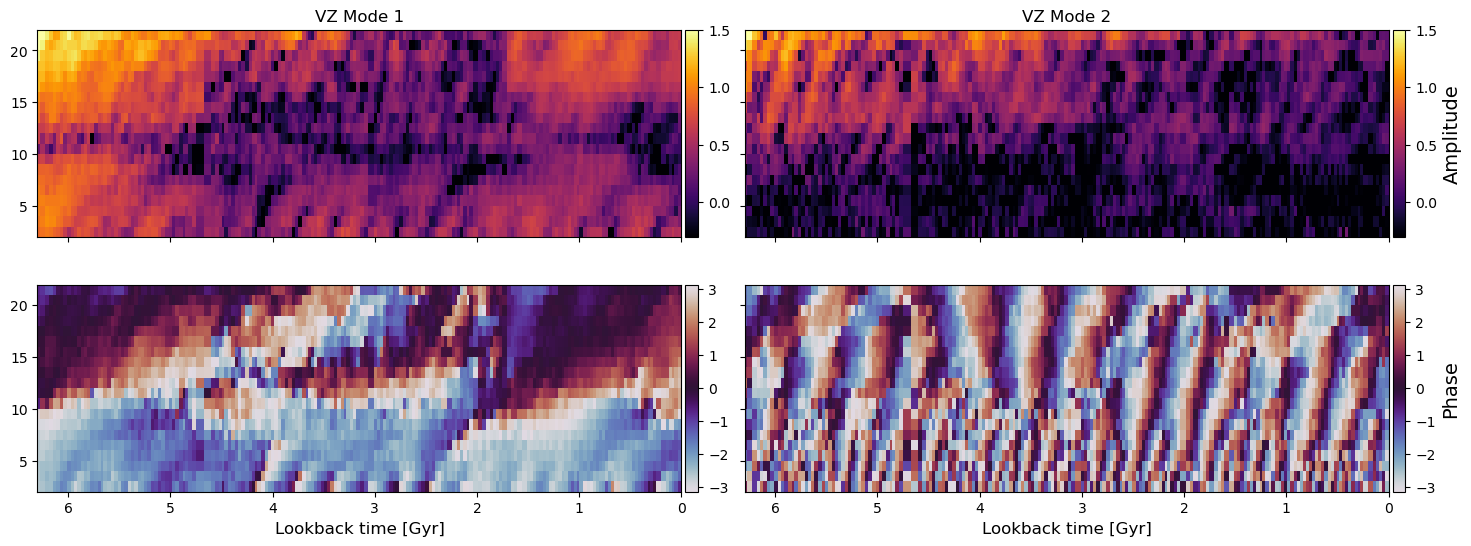

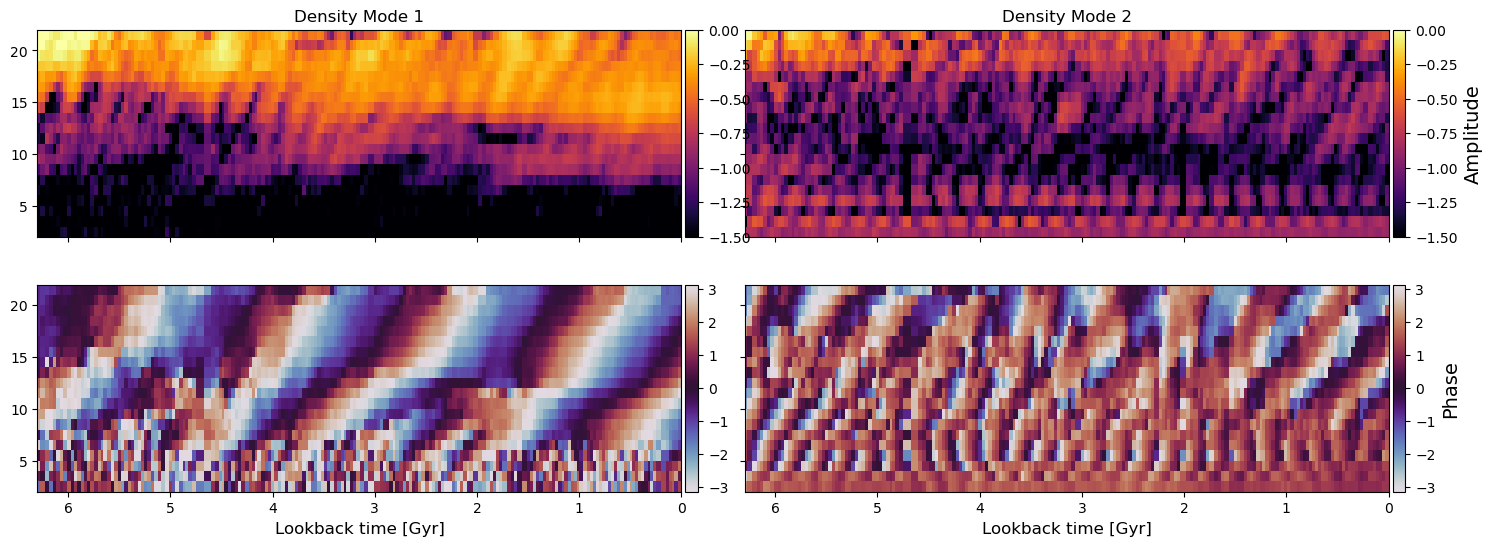

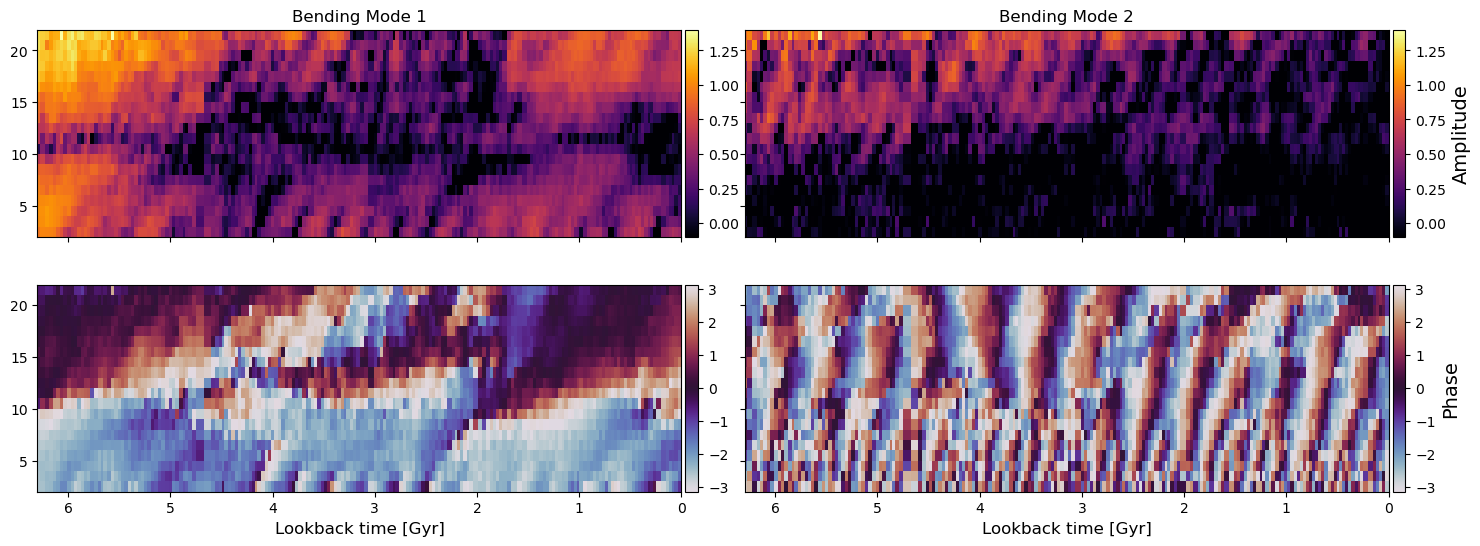

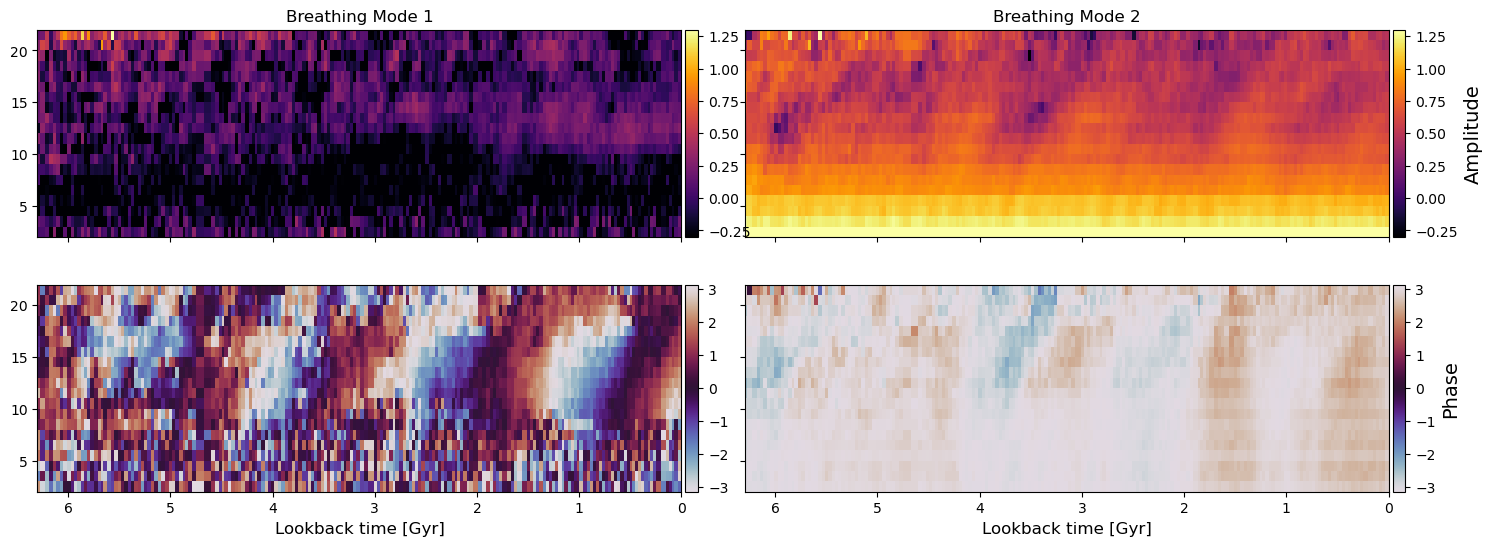

In [4]:

density = pd.read_csv(path_results + f"fourier_22_None_disk_factor2.csv", sep = ",")

z = pd.read_csv(path_results + f"fourier_22_Z_disk_factor2.csv", sep = ",")

vz = pd.read_csv(path_results + f"fourier_22_VZ_disk_factor2.csv", sep = ",")
A = pd.read_csv(path_results + f"fourier_22_breathing_.csv", sep = ",")
#vz = pd.read_csv(path_results + f"fourier_22_VZ_no2.csv", sep = ",")
B = pd.read_csv(path_results + f"fourier_22_bending_.csv", sep = ",")
def process_data_to_plot(data, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"])
    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T

def plot_fourierogram(data, etiqueta, vmin, vmax):
    transparencia = 0.9
    tamaño = 2
        #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    fig, ax = plt.subplots(nrows=2,ncols =2 , sharex = True,sharey = True,  figsize=(18,6))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=22)
    im0 = ax[0,0].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax =vmax, cmap = "inferno")
    im1 = ax[1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=22)
    im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax = vmax, cmap = "inferno")
    im11 = ax[1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,1].set_title(f"{etiqueta} Mode 2")

    plt.xlim(6.3,0)
    plt.ylim(2,22)
    divider = make_axes_locatable(ax[0,0])
    cax = divider.append_axes('right', size='2%', pad=0.04)
    cb = fig.colorbar(im0, cax=cax, orientation='vertical')
    #cb.set_label(label = "Amplitude",fontsize = 14)

    divider = make_axes_locatable(ax[0,1])
    cax = divider.append_axes('right', size='2%', pad=0.04)
    cb = fig.colorbar(im00, cax=cax, orientation='vertical')
    cb.set_label(label = "Amplitude",fontsize = 14)

    divider = make_axes_locatable(ax[1,0])
    cax = divider.append_axes('right', size='2%', pad=0.04)
    cb = fig.colorbar(im1, cax=cax, orientation='vertical')
    #cb.set_label(label = "Phase",fontsize = 14)

    divider = make_axes_locatable(ax[1,1])
    cax = divider.append_axes('right', size='2%', pad=0.04)
    cb = fig.colorbar(im11, cax=cax, orientation='vertical')
    cb.set_label(label = "Phase",fontsize = 14)

    plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.07, hspace= 0.23)
    transparencia = 0.9
    tamaño = 2
    ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
    ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
    #lt.show()
  #  plt.savefig(path_results +f"{etiqueta}_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
#    plt.shoW()
        #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))

plot_fourierogram(z, etiqueta="Z",vmin = -2, vmax = 0.2)
plot_fourierogram(vz, etiqueta="VZ",vmin = -0.3, vmax = 1.5)
plot_fourierogram(density, etiqueta="Density",vmin = -1.5, vmax = 0.)
plot_fourierogram(B, etiqueta="Bending",vmin = -0.1,vmax= 1.4)
plot_fourierogram(A, etiqueta="Breathing",vmin = -0.3,vmax= 1.3)

In [6]:
density_inner = density[(density["Rcenters"]<5)]

In [9]:
np.mean(density_inner["phase2"])*180/np.pi

39.00417305297141

In [66]:
ac_dm_inner =ac_dm[(ac_dm["Rcenters"]<20)&(ac_dm["Rcenters"]>1)]
density_inner = density[(density["Rcenters"]<5)]

In [67]:
np.median(ac_dm_inner["phase1"])*180/np.pi

109.83944125074993

In [68]:
angle = []
lookback =[]
angle_stars = []
for i,snapshot in enumerate(snapshots_analysis):
    df_i = ac_dm_inner[ac_dm_inner["snapshot_t"]==snapshot]
    angle.append(np.median(df_i[f"phase1"])*180/np.pi)
    lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    lookback.append(lb)
    
    df_i = density_inner[density_inner["snapshot_t"]==snapshot]
    angle_stars.append(np.mean(df_i[f"phase2"])*180/np.pi)
    

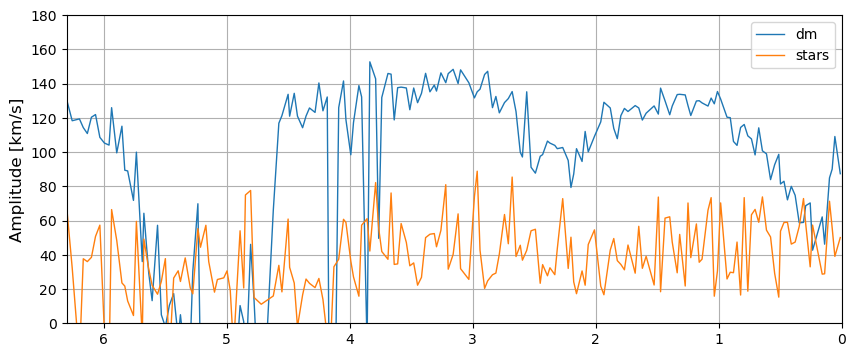

In [69]:

fig, ax = plt.subplots(nrows=1, figsize = (10,4))
ax.plot(lookback,angle,label = "dm", lw=1)
ax.plot(lookback,angle_stars,label = "stars", lw=1)
ax.set_ylabel('Amplitude [km/s]', fontsize = 12)
ax.grid()
ax.set_xlim(6.3,0)
ax.set_ylim(0,180)
ax.legend(fontsize = 10)




In [30]:
bar_density = pd.read_csv(path_results + f"fourier_40_Z_dm_inner.csv", sep = ",")
ac_dm_inner = bar_density[(bar_density["Rcenters"]<5)]
print(np.median(ac_dm_inner["phase1"])*180/np.pi)

109.9069300424601


Text(0.5, 0, 'Lookback time [Gyr]')

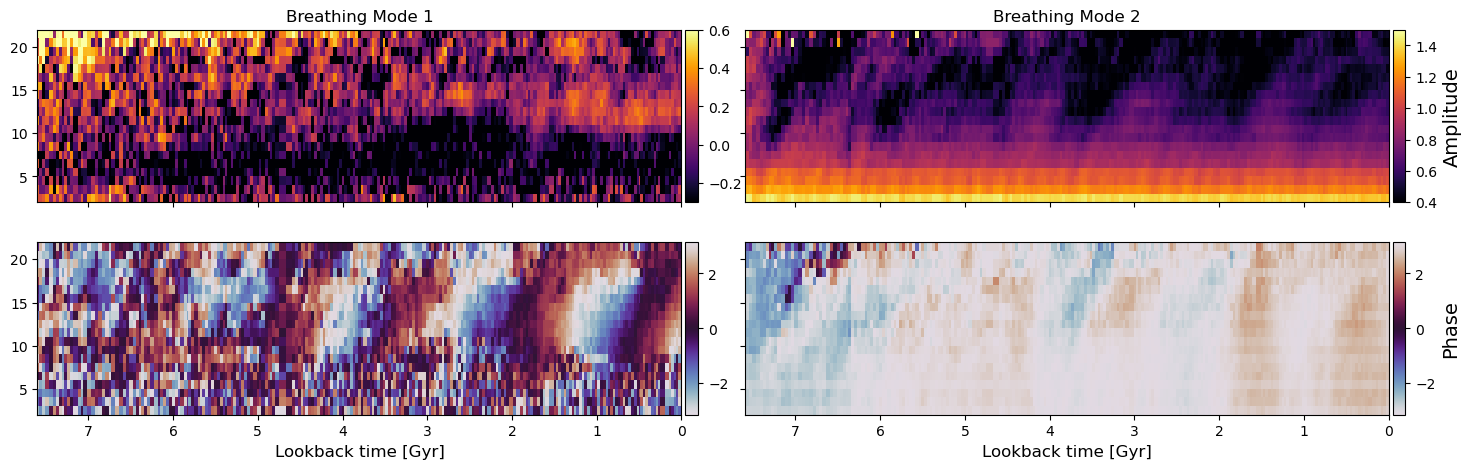

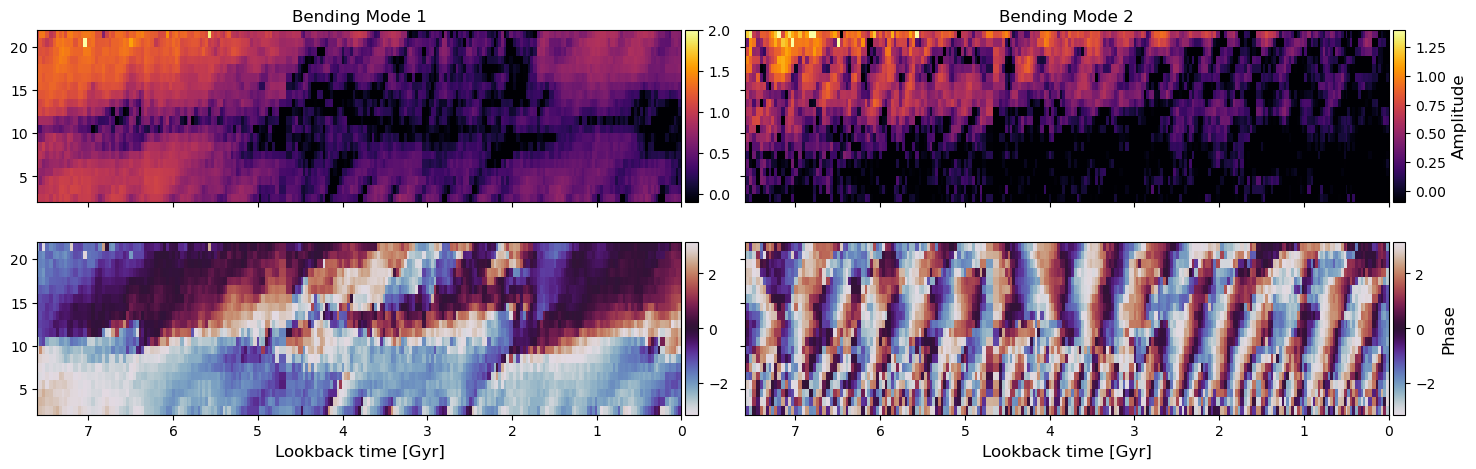

In [7]:
def process_data_to_plot(data, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"])
    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T
A = pd.read_csv(path_results + f"fourier_22_breathing_.csv", sep = ",")
#vz = pd.read_csv(path_results + f"fourier_22_VZ_no2.csv", sep = ",")
B = pd.read_csv(path_results + f"fourier_22_bending_.csv", sep = ",")
#fourier_22_VZ_disk_filtered_All_age.csv

transparencia = 0.9
tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
fig, ax = plt.subplots(nrows=2,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
lookback, rcenters, amplitude, phase = process_data_to_plot(A,modo=1, nbins=22)
im0 = ax[0,0].pcolormesh(lookback,rcenters,amplitude,vmin = -0.3,vmax= 0.6, cmap = "inferno")
im1 = ax[1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
ax[0,0].set_title(f"Breathing Mode 1")
lookback, rcenters, amplitude, phase = process_data_to_plot(A,modo=2, nbins=22)
im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude,vmin = 0.4,vmax= 1.5, cmap = "inferno")
im11 = ax[1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
ax[0,1].set_title(f"Breathing Mode 2")

plt.xlim(7.6,0)
plt.ylim(2,22)
divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='2%', pad=0.04)
cb = fig.colorbar(im0, cax=cax, orientation='vertical')
#cb.set_label(label = "Amplitude",fontsize = 14)

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='2%', pad=0.04)
cb = fig.colorbar(im00, cax=cax, orientation='vertical')
cb.set_label(label = "Amplitude",fontsize = 14)

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='2%', pad=0.04)
cb = fig.colorbar(im1, cax=cax, orientation='vertical')
#cb.set_label(label = "Phase",fontsize = 14)

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='2%', pad=0.04)
cb = fig.colorbar(im11, cax=cax, orientation='vertical')
cb.set_label(label = "Phase",fontsize = 14)

plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.07, hspace= 0.23)
transparencia = 0.9
tamaño = 2
ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
#plt.savefig(path_results +"breathing_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
fig, ax = plt.subplots(nrows=2,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
lookback, rcenters, amplitude, phase = process_data_to_plot(B,modo=1, nbins=22)
im0 = ax[0,0].pcolormesh(lookback,rcenters,amplitude,vmin = -0.1,vmax= 2, cmap = "inferno")
im1 = ax[1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
ax[0,0].set_title(f"Bending Mode 1")
lookback, rcenters, amplitude, phase = process_data_to_plot(B,modo=2, nbins=22)
im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude,vmin = -0.1,vmax= 1.4, cmap = "inferno")
im11 = ax[1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
ax[0,1].set_title(f"Bending Mode 2")

plt.xlim(7.6,0)
plt.ylim(2,22)
divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='2%', pad=0.04)
cb = fig.colorbar(im0, cax=cax, orientation='vertical')
#cb.set_label(label = "Amplitude",fontsize = 12)

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='2%', pad=0.04)
cb = fig.colorbar(im00, cax=cax, orientation='vertical')
cb.set_label(label = "Amplitude",fontsize = 12)

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='2%', pad=0.04)
cb = fig.colorbar(im1, cax=cax, orientation='vertical')
#cb.set_label(label = "Phase",fontsize = 12)

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='2%', pad=0.04)
cb = fig.colorbar(im11, cax=cax, orientation='vertical')
cb.set_label(label = "Phase",fontsize = 12)
plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.07, hspace= 0.23)
ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
#plt.savefig(path_results +"bending_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )

[[        nan         nan         nan ...         nan         nan
          nan]
 [-1.03362301 -0.10310439  0.08682617 ... -0.46081515 -0.28282585
  -0.00770344]
 [-0.28793554  0.26827634 -0.1408562  ... -1.47401448 -2.31955817
  -0.80551426]
 ...
 [ 0.66772705  0.66505903  0.86058573 ...  0.08970421 -0.01978966
  -0.85033027]
 [ 1.28257761  0.72642458  0.89666263 ... -0.42780277 -0.94339787
  -1.31757904]
 [ 1.07730328  0.57914626  1.0264137  ... -1.8691703  -0.2470418
  -0.51267818]]


(7.6, 0.0)

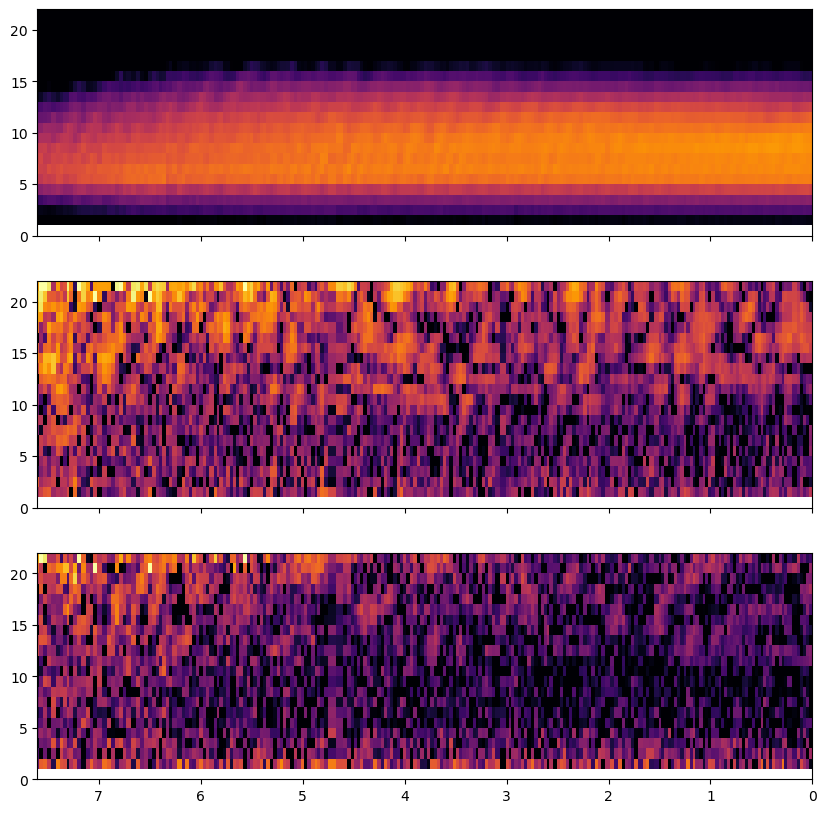

In [44]:
def process_data_to_plot(data, modo, nbins=22, by_npart=False):
    if by_npart ==False:
        arr_z = np.array(data[f"amp{modo}"])
    elif by_npart==True:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T

fig, ax = plt.subplots(nrows=3,ncols =1 , sharex = True,sharey = True,  figsize=(10,10))
lookback, rcenters, amplitude, phase = process_data_to_plot(density,modo=0, nbins=22, by_npart = False)

im0 = ax[0].pcolormesh(lookback,rcenters,amplitude,vmin = 4.6, vmax=5.3, cmap = "inferno")

lookback, rcenters, amplitude, phase = process_data_to_plot(B,modo=0, nbins=22,by_npart = True)
print(amplitude)
im0 = ax[1].pcolormesh(lookback,rcenters,amplitude,vmin = -1, vmax=1, cmap = "inferno")
lookback, rcenters, amplitude, phase = process_data_to_plot(A,modo=0, nbins=22,by_npart = True)
im0 = ax[2].pcolormesh(lookback,rcenters,amplitude,vmin = -1, vmax=1, cmap = "inferno")

plt.xlim(7.6,0)

[[       nan        nan        nan ...        nan        nan        nan]
 [0.0373315  0.02834994 0.0175735  ... 0.02614877 0.01610087 0.01762273]
 [0.072191   0.06051384 0.07922414 ... 0.03164894 0.04584709 0.01692196]
 ...
 [0.0170813  0.2396481  0.1508533  ... 0.08628103 0.07380423 0.16101284]
 [0.21788671 0.19164273 0.12865385 ... 0.02022352 0.09152811 0.04055781]
 [0.11707627 0.16074004 0.23807226 ... 0.03559944 0.07985032 0.09576656]]


(7.6, 0.0)

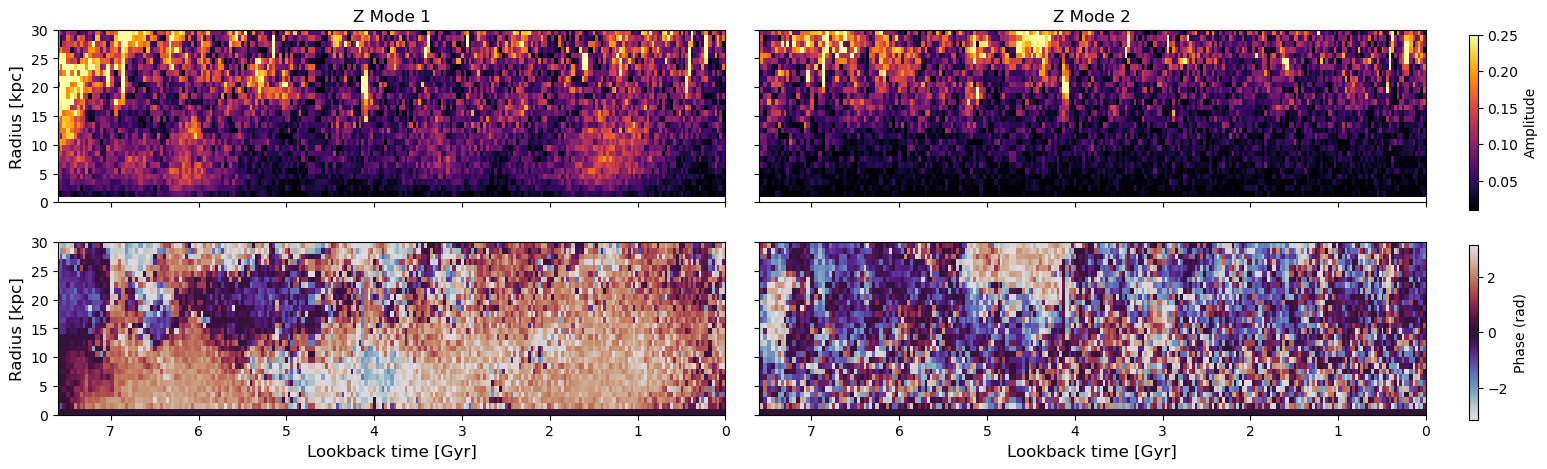

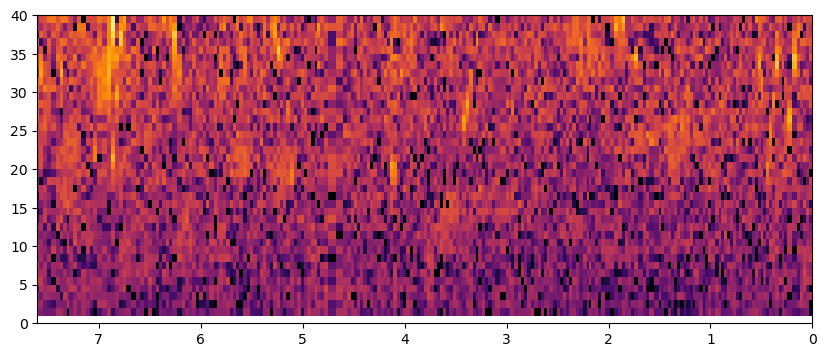

In [55]:
bar_density = pd.read_csv(path_results + f"fourier_40_Z_dm_inner.csv", sep = ",")
def process_data_to_plot(data, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"])
    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],amp.T, phase.T
    
def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    transparencia = 0.9
    tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    print(amplitude)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")
#   for i in range(0,2):
#       for j in range(0,2):
#           ax[2*index + i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#       #Grillo
#           ax[2*index+ i,j].axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
#           
#       #Mosquito
#           ax[2*index+ i,j].axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#   #plt.colorbar()


  #  plt.subplots_adjust(left=0 , bottom= 0.1, right=0.76, top=0.9, wspace=0.05, hspace= 0.05)
  #  plt.show()


fig, ax = plt.subplots(nrows=2,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
plot_modos_fourier (bar_density, index=0,vmin = 0.01, vmax = 0.25,etiqueta =  "Z",  nbins =40)
#plot_modos_fourier (vz, index = 1, vmin = -0.5, vmax = 1.1, etiqueta="VZ",  nbins = 22)
ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
#for i in range(4):
ax[0,0].set_ylabel("Radius [kpc]", fontsize = 12)
ax[1,0].set_ylabel("Radius [kpc]", fontsize = 12)
#ax[1,0].set_ylabel("Radius [kpc]")
#ax[0,0].set_ylabel("Radius [kpc]")
plt.xlim(7.6,0)
plt.ylim(0,30)

transparencia = 0.9
tamaño = 2
#Arania

plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.05, hspace= 0.23)
#plt.savefig(path_results +"density_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


def process_data_to_plot(data, modo, nbins=22, by_npart=False):
    if by_npart ==False:
        arr_z = np.array(data[f"amp{modo}"])
    elif by_npart==True:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T
fig, ax = plt.subplots(nrows=1,ncols =1 , sharex = True,sharey = True,  figsize=(10,4))
lookback, rcenters, amplitude, phase = process_data_to_plot(bar_density,modo=0, nbins=40, by_npart =True)

im0 = ax.pcolormesh(lookback,rcenters,amplitude,vmin = -3, vmax=0.25, cmap = "inferno")

plt.xlim(7.6,0)

[[       nan        nan        nan ...        nan        nan        nan]
 [0.00931915 0.01383686 0.00543418 ... 0.01112694 0.00124466 0.02426118]
 [0.00531805 0.01047721 0.00541788 ... 0.00401551 0.00616171 0.00621149]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


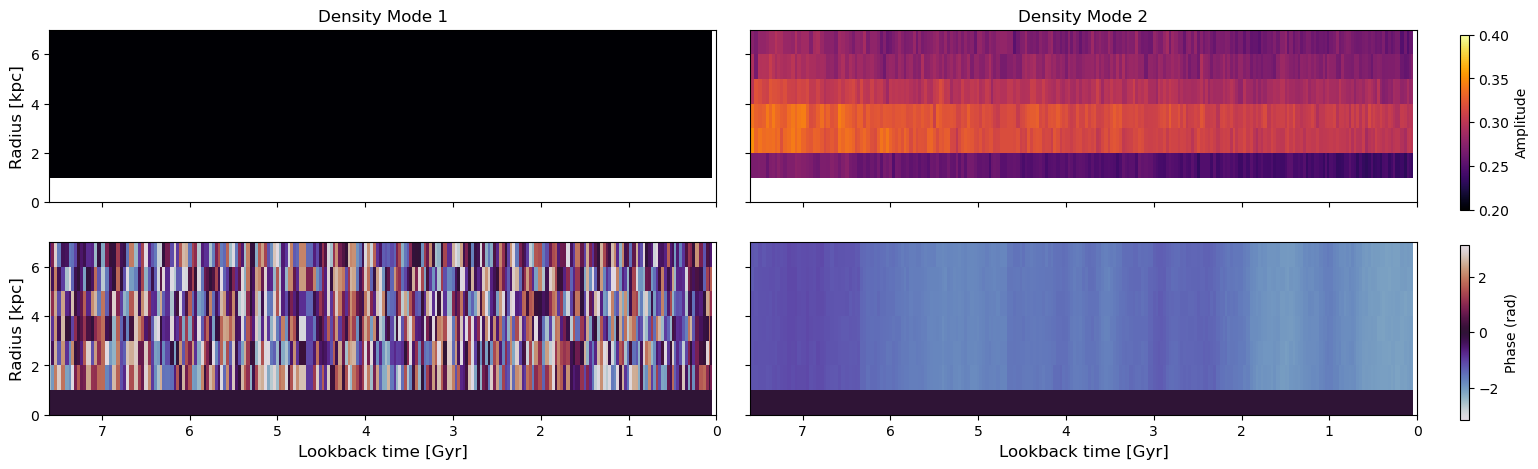

In [109]:
bar_density = pd.read_csv(path_results + f"fourier_22_None_dm_inner.csv", sep = ",")
def process_data_to_plot(data, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"])
    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],amp.T, phase.T
    
def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    transparencia = 0.9
    tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    print(amplitude)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")
#   for i in range(0,2):
#       for j in range(0,2):
#           ax[2*index + i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#       #Grillo
#           ax[2*index+ i,j].axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
#           
#       #Mosquito
#           ax[2*index+ i,j].axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#   #plt.colorbar()


  #  plt.subplots_adjust(left=0 , bottom= 0.1, right=0.76, top=0.9, wspace=0.05, hspace= 0.05)
  #  plt.show()


fig, ax = plt.subplots(nrows=2,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
plot_modos_fourier (bar_density, index=0,vmin = 0.2, vmax = 0.4,etiqueta =  "Density",  nbins = 22)
#plot_modos_fourier (vz, index = 1, vmin = -0.5, vmax = 1.1, etiqueta="VZ",  nbins = 22)
ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
#for i in range(4):
ax[0,0].set_ylabel("Radius [kpc]", fontsize = 12)
ax[1,0].set_ylabel("Radius [kpc]", fontsize = 12)
#ax[1,0].set_ylabel("Radius [kpc]")
#ax[0,0].set_ylabel("Radius [kpc]")
plt.xlim(7.6,0)
plt.ylim(0,7)

transparencia = 0.9
tamaño = 2
#Arania

plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.05, hspace= 0.23)
#plt.savefig(path_results +"density_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


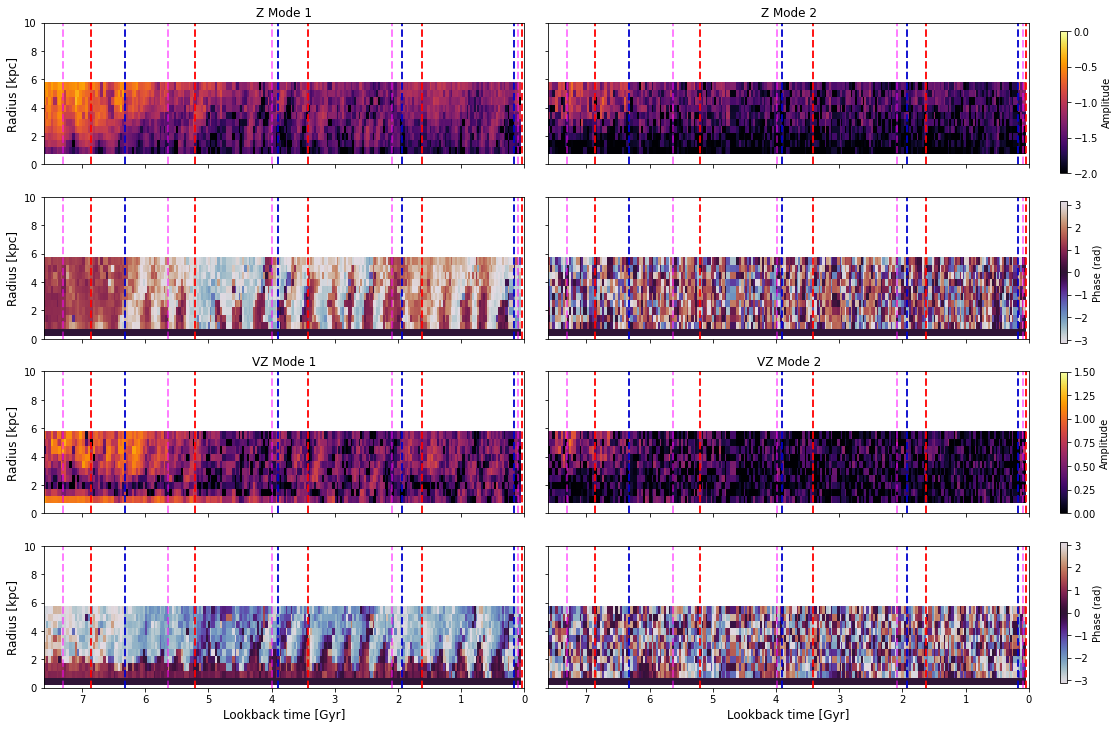

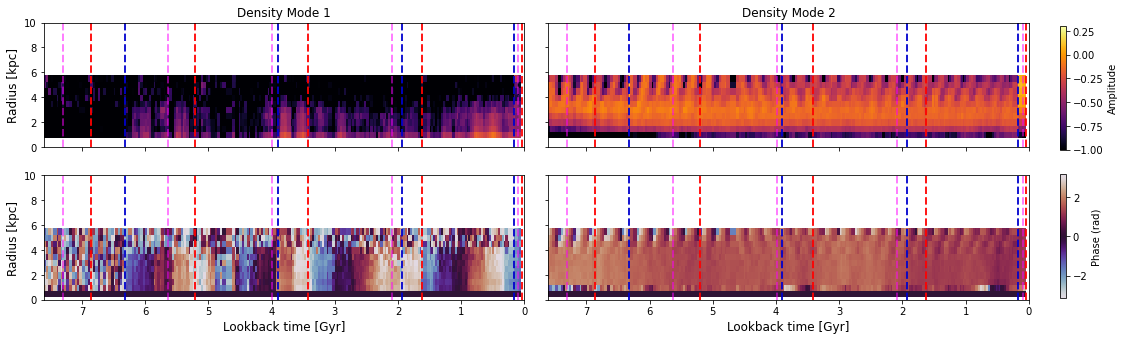

In [42]:
bar_density = pd.read_csv(path_results + f"fourier_12_None_bar_35_percentile_Gyr.csv", sep = ",")

bar_z = pd.read_csv(path_results + f"fourier_12_Z_bar_35_percentile_Gyr.csv", sep = ",")
bar_vz = pd.read_csv(path_results + f"fourier_12_VZ_bar_35_percentile_Gyr.csv", sep = ",")
def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    transparencia = 0.9
    tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")
    for i in range(0,2):
        for j in range(0,2):
            ax[2*index + i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
        #Grillo
            ax[2*index+ i,j].axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
            
        #Mosquito
            ax[2*index+ i,j].axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    #plt.colorbar()


  #  plt.subplots_adjust(left=0 , bottom= 0.1, right=0.76, top=0.9, wspace=0.05, hspace= 0.05)
  #  plt.show()

fig, ax = plt.subplots(nrows=2*2,ncols =2 , sharex = True,sharey = True,  figsize=(18,12))

plot_modos_fourier (bar_z, index=0,   vmin = -2, vmax = 0, etiqueta="Z",  nbins = 12)
plot_modos_fourier (bar_vz, index = 1, vmin = 0, vmax = 1.5, etiqueta="VZ",  nbins = 12)
ax[3,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
ax[3,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
for i in range(4):
    ax[i,0].set_ylabel("Radius [kpc]",  fontsize = 12)
#ax[1,0].set_ylabel("Radius [kpc]")
#ax[0,0].set_ylabel("Radius [kpc]")
plt.xlim(7.6,0)
plt.ylim(0,10)


transparencia = 0.9
tamaño = 2
#Arania



plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.05, hspace= 0.23)
#plt.savefig(path_results +"ejemplo_poster_zVz.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


fig, ax = plt.subplots(nrows=2,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))

plot_modos_fourier (bar_density, index=0,vmin = -1, vmax = 0.3,etiqueta =  "Density",  nbins = 12)
#plot_modos_fourier (vz, index = 1, vmin = -0.5, vmax = 1.1, etiqueta="VZ",  nbins = 22)
ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
#for i in range(4):
ax[0,0].set_ylabel("Radius [kpc]", fontsize = 12)
ax[1,0].set_ylabel("Radius [kpc]", fontsize = 12)
#ax[1,0].set_ylabel("Radius [kpc]")
#ax[0,0].set_ylabel("Radius [kpc]")
plt.xlim(7.6,0)
plt.ylim(0,10)

transparencia = 0.9
tamaño = 2
#Arania



plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.05, hspace= 0.23)
#plt.savefig(path_results +"density_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


Text(0.5, 0, 'Lookback time [Gyr]')

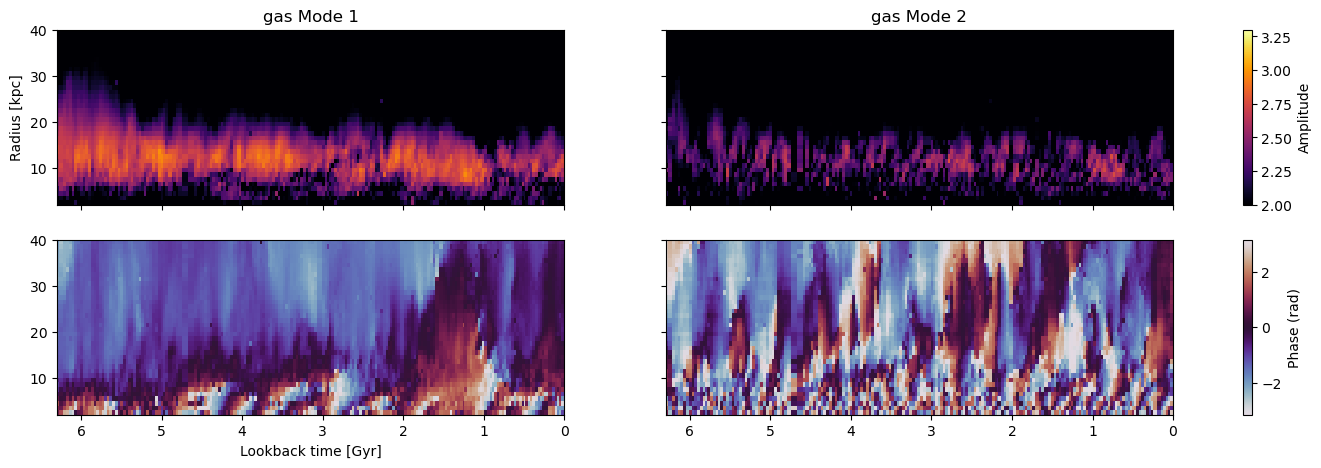

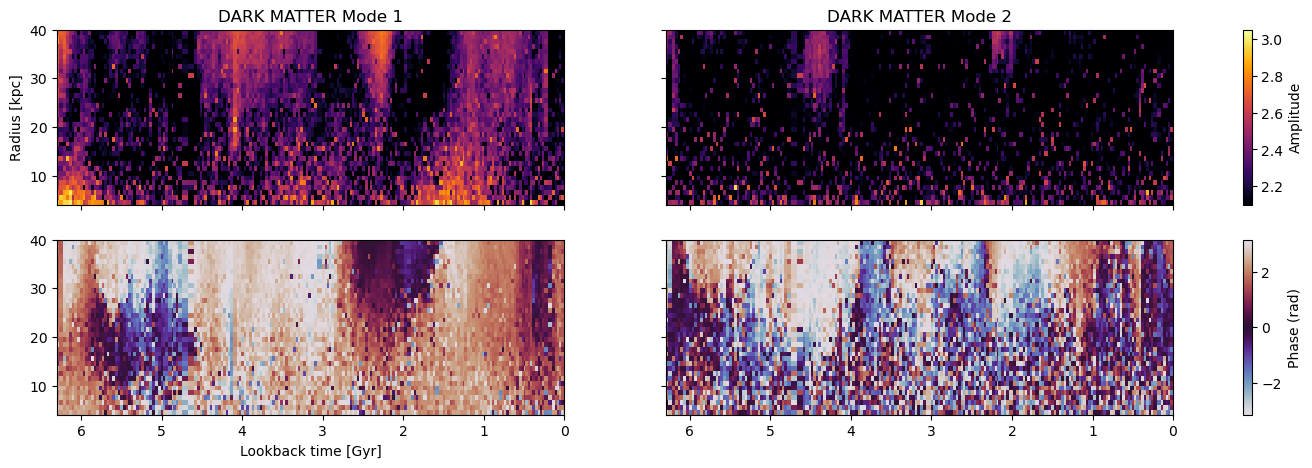

In [5]:
def process_data_to_plot(data, modo, nbins=22):
    arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
 #   print(arr_z)
 #   arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
  #  print(np.max(np.log10(amp.T)))
  #  print(np.min(np.log10(amp.T)))
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins], amp.T, phase.T

def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    transparencia = 0.9
    tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")

    #plt.colorbar()
transparencia = 0.9
tamaño = 2



ac_gas = pd.read_csv(path_results + f"fourier_40_az_acceleration_gas_torque.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_gas, index=0,vmin = -16.5, vmax = -14.0, etiqueta =  "gas", nbins = 40)
#plot_modos_fourier (ac_gas, index=0, vmin = 0, vmax = 8000,etiqueta =  "gas", nbins = 40)
plot_modos_fourier (ac_gas, index=0, vmin = 2, vmax = 3.3,etiqueta =  "gas", nbins = 40)
plt.xlim(6.3,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_gas.png", dpi = 100, bbox_inches='tight', facecolor = "white" )



ac_dm = pd.read_csv(path_results + f"fourier_40_az_acceleration_dm_torque.csv", sep = ",")
#ac_dm = pd.read_csv("prueba_dm_fourier.csv",sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2,sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_gas, index=0,vmin = -16.5, vmax = -14.0, etiqueta =  "DARK MATTER", nbins = 40)
#plot_modos_fourier (ac_dm, index=0,  vmin = 0, vmax = 8000,etiqueta =  "DARK MATTER", nbins = 40)
plot_modos_fourier (ac_dm, index=0,  vmin = 2.1, vmax =3.05,etiqueta =  "DARK MATTER", nbins = 40)
plt.xlim(6.3,0)
plt.ylim(4,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_dm.png", dpi = 100, bbox_inches='tight', facecolor = "white" )



(6.3, 0.0)

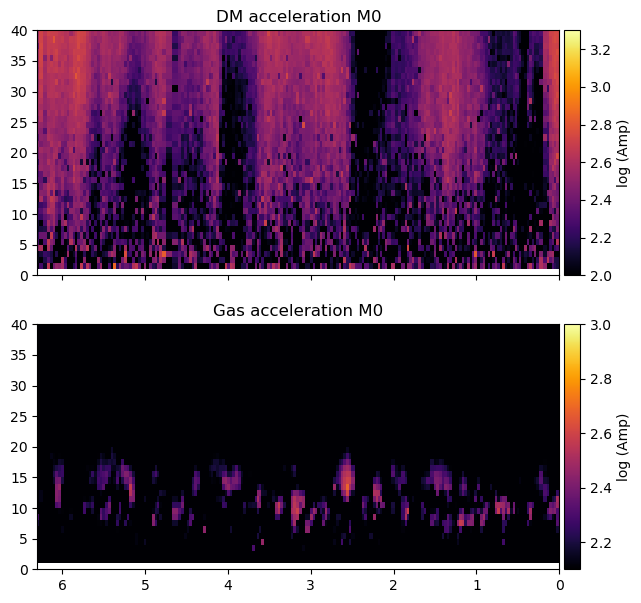

In [18]:
def process_data_to_plot(data, modo, nbins=22):
    arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
 #   print(arr_z)
 #   arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
  #  print(np.max(np.log10(amp.T)))
  #  print(np.min(np.log10(amp.T)))
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins], amp.T, phase.T
def add_colorbar(ax, a):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(a, cax=cax, orientation='vertical', label = "log (Amp)")

fig, ax = plt.subplots(nrows=2,ncols =1 , sharex = True,sharey = True,  figsize=(7,7))

lookback, rcenters, amplitude, phase = process_data_to_plot(ac_dm,modo=0, nbins=40)
im0 = ax[0].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = 2, vmax = 3.3, cmap = "inferno")
add_colorbar(ax[0], im0)
ax[0].set_title("DM acceleration M0")

lookback, rcenters, amplitude, phase = process_data_to_plot(ac_gas,modo=0, nbins=40)
im0 = ax[1].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = 2.1, vmax=3, cmap = "inferno")
add_colorbar(ax[1], im0)
ax[1].set_title("Gas acceleration M0")



ax[0].set_xlim(6.3,0)
ax[1].set_xlim(6.3,0)


In [27]:
gas_10 = ac_gas[(ac_gas["Rcenters"]<10)&(ac_gas["Rcenters"]>5)]
gas_15 = ac_gas[(ac_gas["Rcenters"]<15)&(ac_gas["Rcenters"]>10)]
gas_25 = ac_gas[(ac_gas["Rcenters"]<25)&(ac_gas["Rcenters"]>20)]





dm_10 = ac_dm[(ac_dm["Rcenters"]<10)&(ac_dm["Rcenters"]>5)]
dm_15 = ac_dm[(ac_dm["Rcenters"]< 15)&(ac_dm["Rcenters"]>10)]
dm_25 = ac_dm[(ac_dm["Rcenters"]< 40)&(ac_dm["Rcenters"]>20)]


gas_torque_10 = []
gas_torque_15 = []
gas_torque_25 = []
dm_torque_10 = []
dm_torque_15 = []
dm_torque_25 = []
lookback = []
mode = 1
for i,snapshot in enumerate(snapshots_analysis):
    df_i = gas_15[gas_15["snapshot_t"]==snapshot]
    gas_torque_15.append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
    df_i = gas_10[gas_10["snapshot_t"]==snapshot]
    gas_torque_10.append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
    df_i = gas_25[gas_25["snapshot_t"]==snapshot]
    gas_torque_25.append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
    
    
    df_i = dm_15[dm_15["snapshot_t"]==snapshot]
    dm_torque_15.append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
    df_i = dm_10[dm_10["snapshot_t"]==snapshot]
    dm_torque_10.append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
    df_i = dm_25[dm_25["snapshot_t"]==snapshot]
    dm_torque_25.append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
    lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    lookback.append(lb)

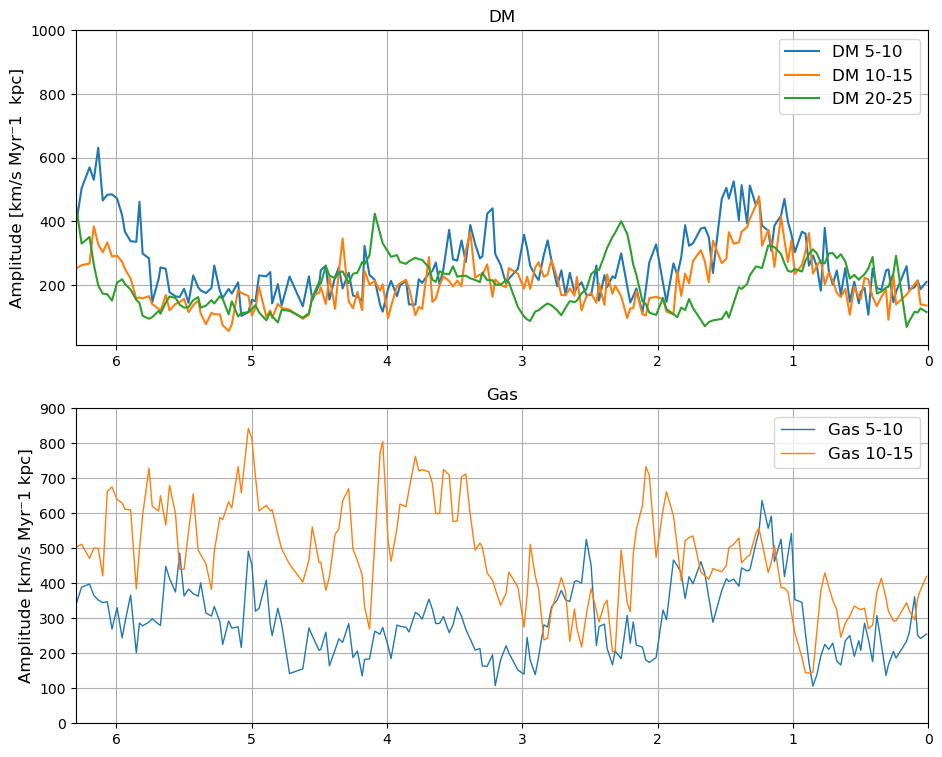

In [28]:
fig, ax = plt.subplots(nrows=2, figsize = (11,9))



ax[0].set_title("DM")

ax[0].plot(lookback, np.array(dm_torque_10)*seconds_to_Myr,label = "DM 5-10")
ax[0].plot(lookback,np.array(dm_torque_15)*seconds_to_Myr,label = "DM 10-15")
ax[0].plot(lookback,np.array(dm_torque_25)*seconds_to_Myr,label = "DM 20-25")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [km/s Myr⁻1  kpc]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(6.3,0)
#ax[1].set_ylim(0.,0.15)
ax[0].legend(fontsize = 12)


ax[1].set_title("Gas")

ax[1].plot(lookback, np.array(gas_torque_10)*seconds_to_Myr,label = "Gas 5-10", lw = 1)
ax[1].plot(lookback,np.array(gas_torque_15)*seconds_to_Myr,label = "Gas 10-15", lw = 1)
#ax[1].plot(lookback,np.array(gas_torque_25)*seconds_to_Myr,label = "Gas 20-25")
#axplot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [km/s Myr⁻1 kpc]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(6.3,0)
ax[1].set_ylim(0, 900)
ax[1].legend(fontsize = 12)




#plt.savefig("results/Z_VZ_fourier_shells.png", dpi = 100, facecolor = "white")



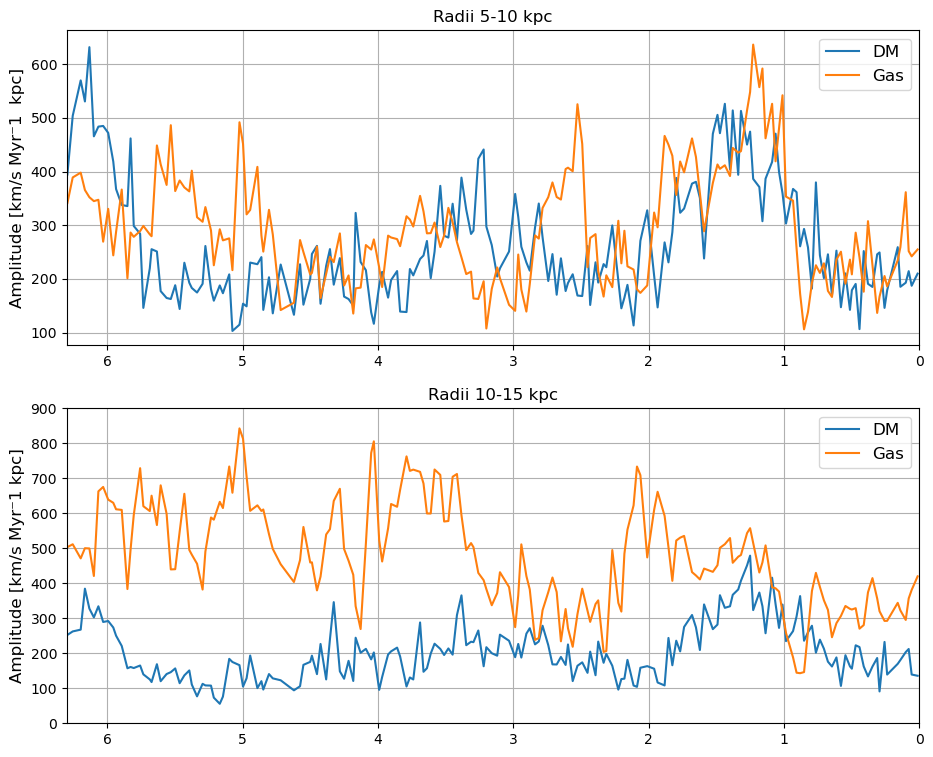

In [22]:
fig, ax = plt.subplots(nrows=2, figsize = (11,9))



ax[0].set_title("Radii 5-10 kpc")

ax[0].plot(lookback, np.array(dm_torque_10)*seconds_to_Myr,label = "DM")
ax[0].plot(lookback,np.array(gas_torque_10)*seconds_to_Myr,label = "Gas")

#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [km/s Myr⁻1  kpc]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(6.3,0)
#ax[1].set_ylim(0.,0.15)
ax[0].legend(fontsize = 12)


ax[1].set_title("Radii 10-15 kpc")

ax[1].plot(lookback, np.array(dm_torque_15)*seconds_to_Myr,label = "DM")
ax[1].plot(lookback,np.array(gas_torque_15)*seconds_to_Myr,label = "Gas")

#axplot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [km/s Myr⁻1 kpc]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(6.3,0)
#
ax[1].set_ylim(0, 900)
ax[1].legend(fontsize = 12)




#plt.savefig("results/Z_VZ_fourier_shells.png", dpi = 100, facecolor = "white")



Text(0.5, 0, 'Lookback time [Gyr]')

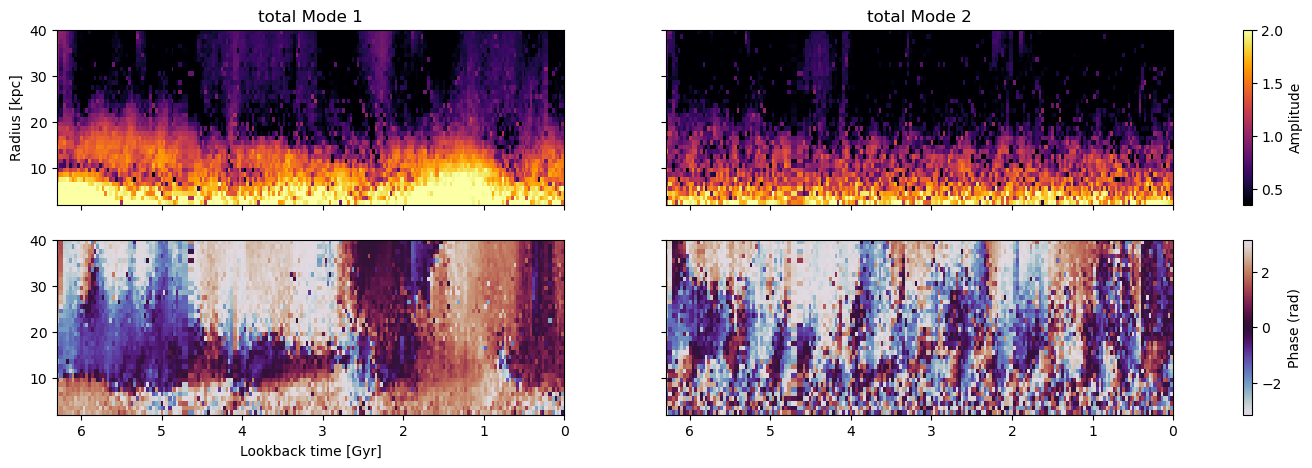

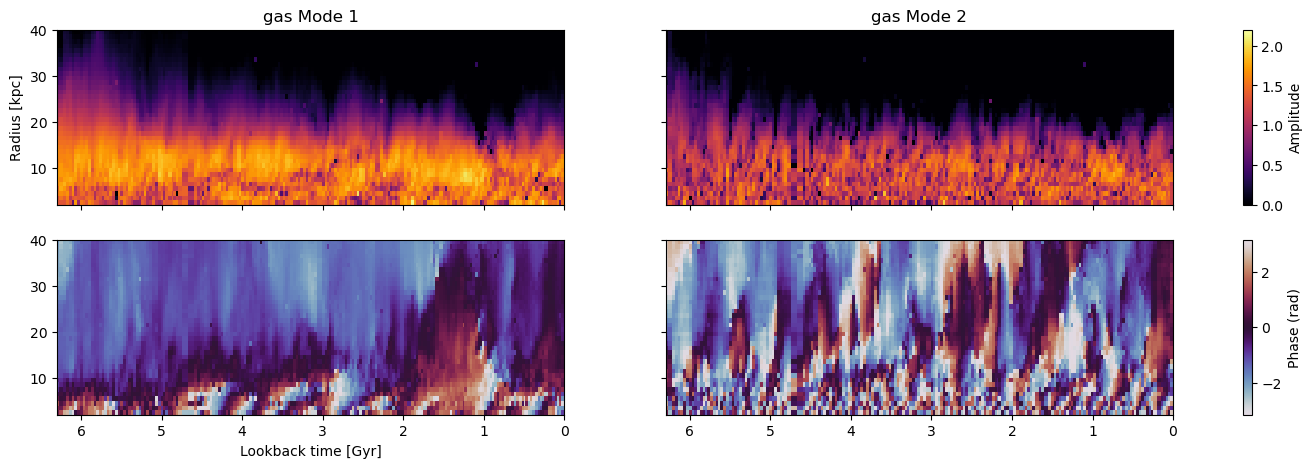

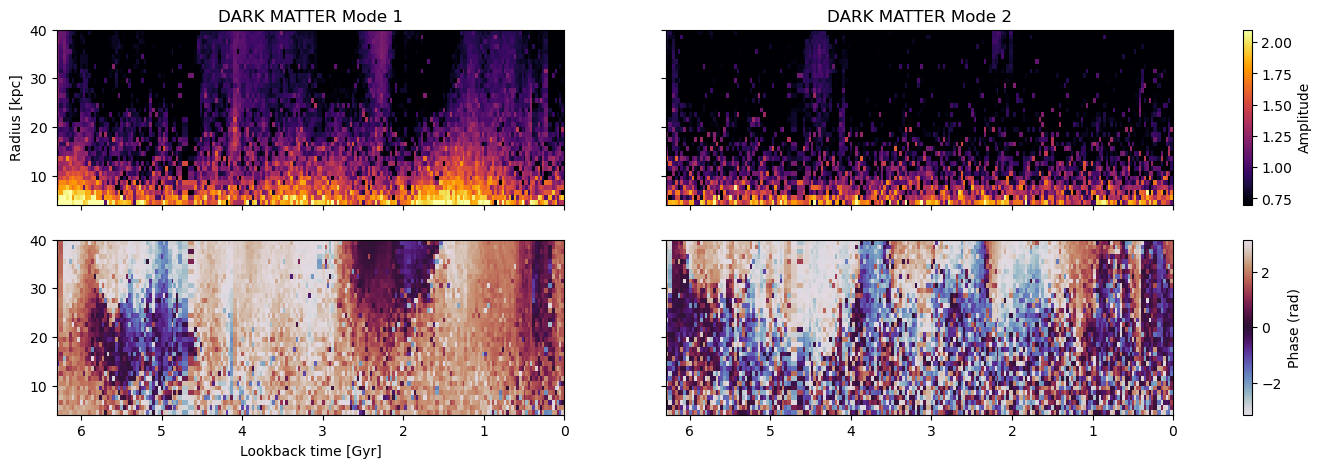

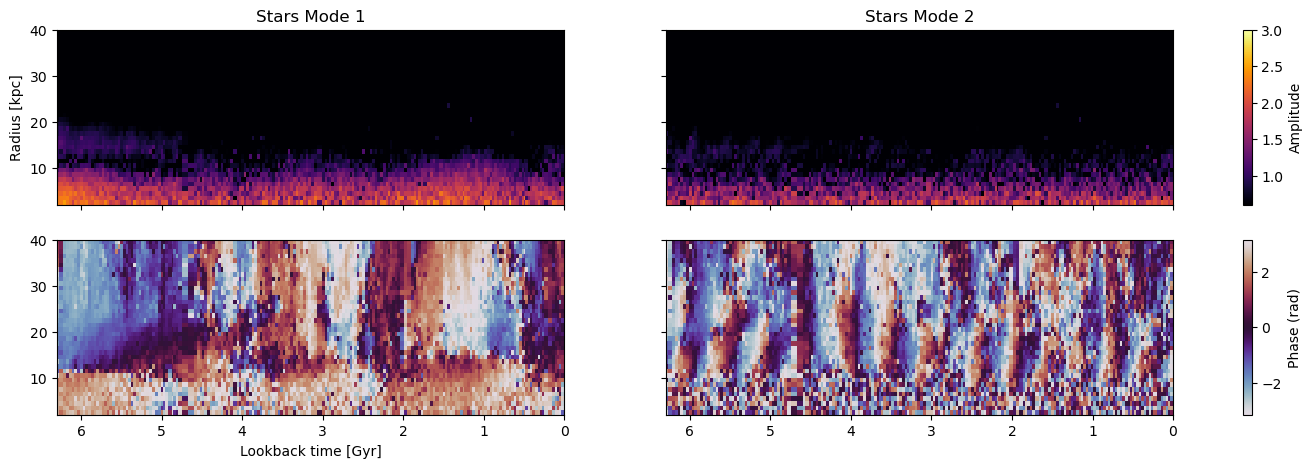

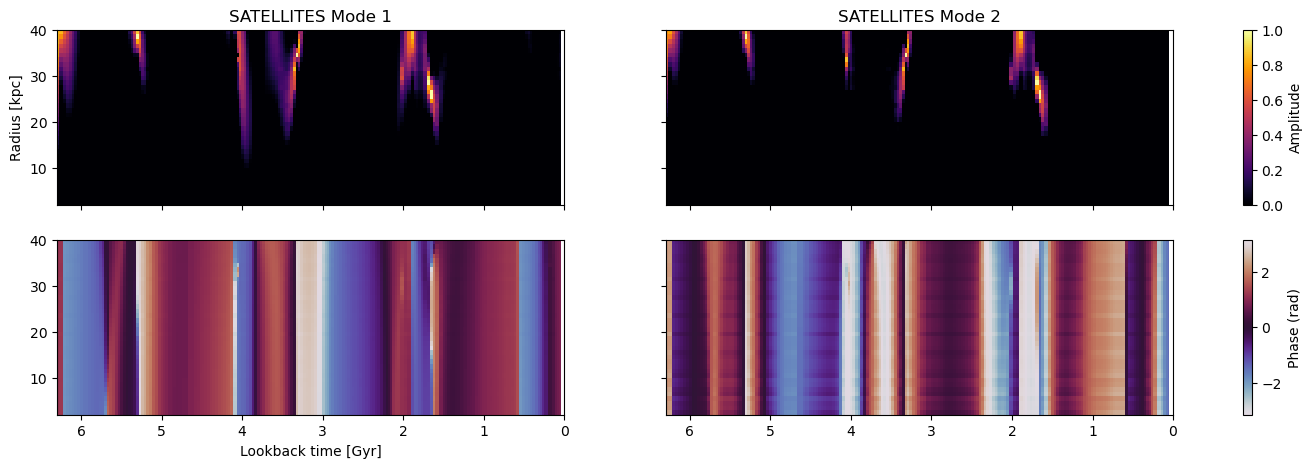

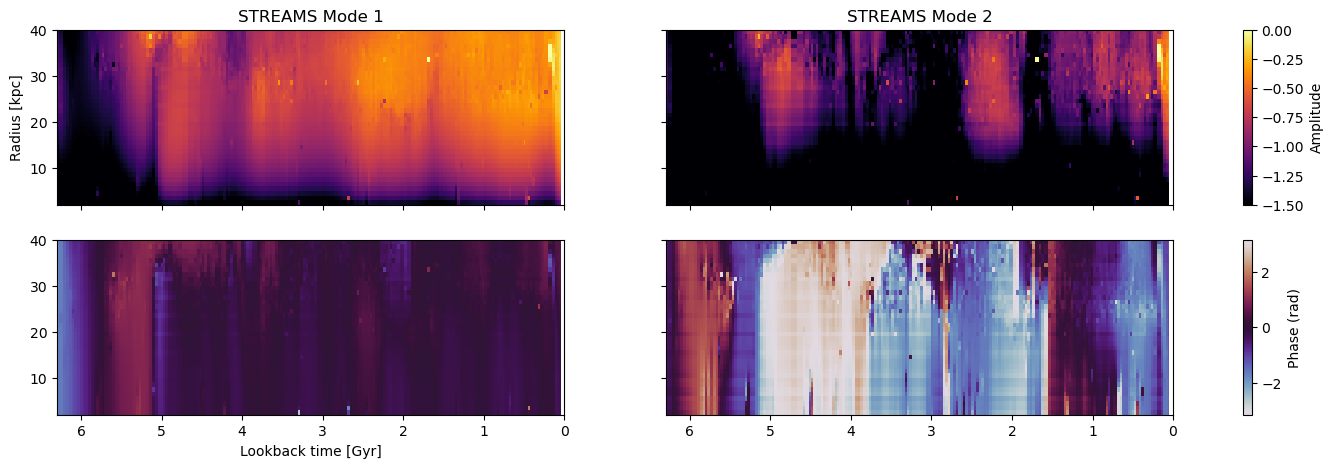

In [10]:
def process_data_to_plot(data, modo, nbins=22):
    arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
 #   print(arr_z)
 #   arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
  #  print(np.max(np.log10(amp.T)))
  #  print(np.min(np.log10(amp.T)))
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins], amp.T, phase.T

def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    transparencia = 0.9
    tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")
#   for i in range(0,2):
#       for j in range(0,2):
#           ax[2*index + i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#       #Grillo
#           ax[2*index+ i,j].axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
#           ax[2*index+ i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
#           
#       #Mosquito
#           ax[2*index+ i,j].axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
#           ax[2*index+ i,j].axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    #plt.colorbar()
transparencia = 0.9
tamaño = 2


ac_total = pd.read_csv(path_results + f"fourier_40_az_acceleration_total.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_gas, index=0,vmin = -16.5, vmax = -14.0, etiqueta =  "gas", nbins = 40)
#plot_modos_fourier (ac_gas, index=0, vmin = 0, vmax = 8000,etiqueta =  "gas", nbins = 40)
plot_modos_fourier (ac_total, index=0, vmin = 0.35, vmax = 2,etiqueta =  "total", nbins = 40)
plt.xlim(6.3,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_gas.png", dpi = 100, bbox_inches='tight', facecolor = "white" )




ac_gas = pd.read_csv(path_results + f"fourier_40_az_acceleration_gas.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_gas, index=0,vmin = -16.5, vmax = -14.0, etiqueta =  "gas", nbins = 40)
#plot_modos_fourier (ac_gas, index=0, vmin = 0, vmax = 8000,etiqueta =  "gas", nbins = 40)
plot_modos_fourier (ac_gas, index=0, vmin = 0, vmax = 2.2,etiqueta =  "gas", nbins = 40)
plt.xlim(6.3,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_gas.png", dpi = 100, bbox_inches='tight', facecolor = "white" )



ac_dm = pd.read_csv(path_results + f"fourier_40_az_acceleration_dm.csv", sep = ",")
#ac_dm = pd.read_csv("prueba_dm_fourier.csv",sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2,sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_gas, index=0,vmin = -16.5, vmax = -14.0, etiqueta =  "DARK MATTER", nbins = 40)
#plot_modos_fourier (ac_dm, index=0,  vmin = 0, vmax = 8000,etiqueta =  "DARK MATTER", nbins = 40)
plot_modos_fourier (ac_dm, index=0,  vmin = 0.70, vmax =2.1,etiqueta =  "DARK MATTER", nbins = 40)
plt.xlim(6.3,0)
plt.ylim(4,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
plt.savefig(path_results +"fourier_modes_dm.png", dpi = 100, bbox_inches='tight', facecolor = "white" )

ac_disk = pd.read_csv(path_results + f"fourier_40_az_acceleration_stars.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_disk, index=0,vmin = 0, vmax = 14000, etiqueta =  "DISK", nbins = 22)
plot_modos_fourier (ac_disk, index=0,vmin = 0.6, vmax = 3, etiqueta =  "Stars", nbins = 40)
plt.xlim(6.3,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")


ac_sat = pd.read_csv(path_results + f"fourier_40_az_core_sat_prog.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_sat, index=0, vmin = 0, vmax = 500, etiqueta =  "SATELLITES", nbins = 40)
plot_modos_fourier (ac_sat, index=0, vmin= 0., vmax = 1, etiqueta =  "SATELLITES", nbins = 40)
plt.xlim(6.3,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_satellites.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


ac_streams = pd.read_csv(path_results + f"fourier_40_az_stream_sat_streams.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_streams, index=0,vmin = 0, vmax = 500, etiqueta =  "STREAMS", nbins = 40)
plot_modos_fourier (ac_streams, index=0,vmin = -1.5, vmax=0, etiqueta =  "STREAMS", nbins = 40)
plt.xlim(6.3,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_streams.png", dpi = 100, bbox_inches='tight', facecolor = "white" )



#plt.savefig(path_results +"fourier_modes_disk.png", dpi = 100, bbox_inches='tight', facecolor = "white" )

(6.3, 0.0)

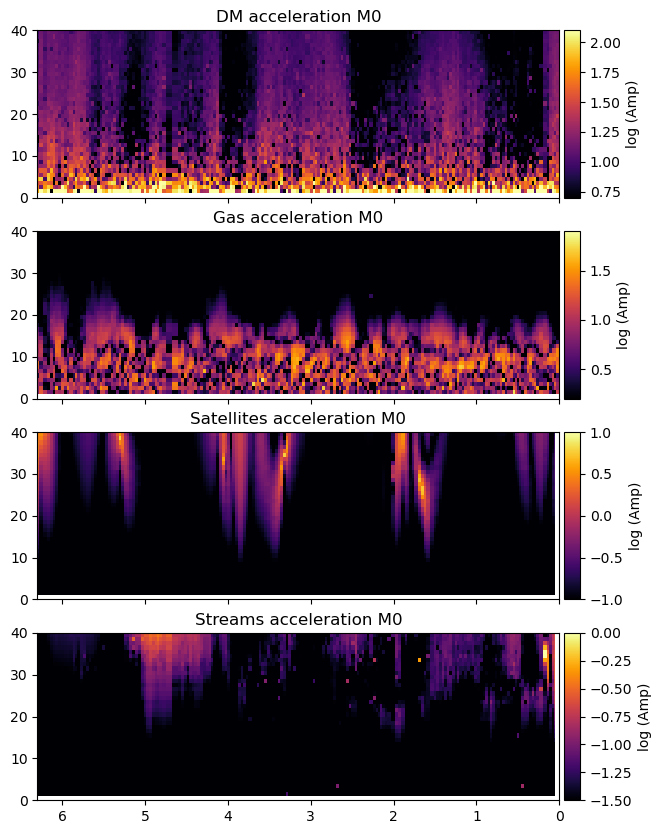

In [11]:
def process_data_to_plot(data, modo, nbins=22):
    arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
 #   print(arr_z)
 #   arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
  #  print(np.max(np.log10(amp.T)))
  #  print(np.min(np.log10(amp.T)))
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins], amp.T, phase.T
def add_colorbar(ax, a):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(a, cax=cax, orientation='vertical', label = "log (Amp)")

fig, ax = plt.subplots(nrows=4,ncols =1 , sharex = True,sharey = True,  figsize=(7,10))

lookback, rcenters, amplitude, phase = process_data_to_plot(ac_dm,modo=0, nbins=40)
im0 = ax[0].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = 0.7, vmax=2.1, cmap = "inferno")
add_colorbar(ax[0], im0)
ax[0].set_title("DM acceleration M0")

lookback, rcenters, amplitude, phase = process_data_to_plot(ac_gas,modo=0, nbins=40)
im0 = ax[1].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = 0.2, vmax=1.9, cmap = "inferno")
add_colorbar(ax[1], im0)
ax[1].set_title("Gas acceleration M0")

lookback, rcenters, amplitude, phase = process_data_to_plot(ac_sat,modo=0, nbins=40)
im0 = ax[2].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = -1, vmax=1, cmap = "inferno")
add_colorbar(ax[2], im0)
ax[2].set_title("Satellites acceleration M0")

lookback, rcenters, amplitude, phase = process_data_to_plot(ac_streams,modo=0, nbins=40)
im0 = ax[3].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr),vmin = -1.5, vmax=0, cmap = "inferno")
add_colorbar(ax[3], im0)
ax[3].set_title("Streams acceleration M0")


ax[0].set_xlim(6.3,0)
ax[1].set_xlim(6.3,0)
ax[2].set_xlim(6.3,0)
ax[3].set_xlim(6.3,0)

In [8]:
density = pd.read_csv(path_results + f"fourier_22_None_disc_5Gyr.csv", sep = ",")
z = pd.read_csv(path_results + f"fourier_22_Z_disc_5Gyr.csv", sep = ",")
vz = pd.read_csv(path_results + f"fourier_22_VZ_disc_5Gyr.csv", sep = ",")
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

Text(0.5, 0, 'Lookback time [Gyr]')

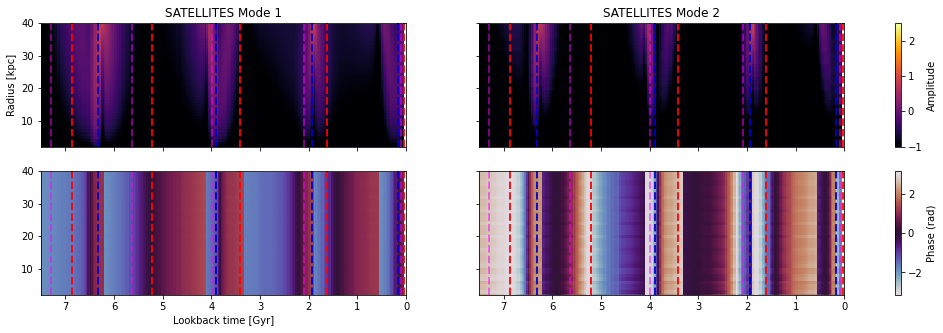

In [16]:
ac_arania = pd.read_csv(path_results + f"fourier_40_az_core_sat_prog_arania.csv", sep = ",")
ac_grillo = pd.read_csv(path_results + f"fourier_40_az_core_sat_prog_grillo.csv", sep = ",")
ac_mosquito = pd.read_csv(path_results + f"fourier_40_az_core_sat_prog_mosquito.csv", sep = ",")

fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_sat, index=0, vmin = 0, vmax = 500, etiqueta =  "SATELLITES", nbins = 40)
plot_modos_fourier (ac_arania, index=0, vmin = -1, vmax = 2.5, etiqueta =  "SATELLITES", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")

In [7]:
snapshots_analysis = [520,523,525, 527,530,532,535, 537,539,541,
543, 545,547, 550, 553, 555,557, 
560, 563, 565, 567,570,573, 575, 577, 580,
583, 585,587,590, 592,594,
596,598,600,
602, 604, 608, 610, 612, 614, 616, 618, 620, 622, 624, 626, 
629, 630, 632, 634, 636, 639, 640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 
664, 666, 668,670, 672, 674, 676, 679, 681, 682, 684, 687, 689,
690, 692, 694, 698, 704,  706, 708,711, 712,714, 716,
718, 720, 722, 724, 726, 728, 731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752,
755, 756, 758, 761,763, 764, 766, 768, 770, 772, 774, 776, 778, 780, 
782, 784, 786, 788, 790, 792, 794, 797, 798, 802, 805, 806, 808, 810, 812, 814, 816,
818, 820, 822, 824, 826, 828, 830, 832, 834, 836, 839, 840, 842, 844, 846, 848, 850,
853, 855, 856, 858, 860, 862, 864, 867, 870, 872, 875, 877, 879, 881, 883, 884, 888,
890, 892, 894, 898, 900, 902, 904, 907, 908, 910, 912, 915, 916, 918, 921, 922, 924, 927, 929, 
930, 932, 934, 937,
 939, 941,942, 944, 946, 948, 950, 952, 954,956, 
958, 961, 963, 965, 966, 968, 970, 972, 974, 976, 979,
980, 982, 984, 989, 990, 993, 994, 996, 999]

def add_satellites(ax):
    transparencia = 0.4
    tamaño = 2   
    #arania
    ax.axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    #Grillo
    ax.axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
    #mosquito
    ax.axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha =transparencia)
    ax.axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)

In [9]:
variables = ["Z", "VZ", "Bending","Breathing","density", "BendingM2", "BreathingM2", "densityM2", "DM", "Gas", "Stars", "Satelites","All"]
variables_m1 = ["Z", "VZ", "Bending","Breathing","density", "DM", "Gas", "Stars", "Satelites","All"]
variables_acc = [ "DM", "Gas", "Stars","Satelites", "All"]
rings = ["5", "10", "15"]
estimator_5 = {}
estimator_10 = {}
estimator_15 = {}
#generation of dictionary
estimator_5["Lookback"] = []
estimator_10["Lookback"] = []
estimator_15["Lookback"] = []
for var1 in variables:
    estimator_5[f"{var1}"] = []
    estimator_10[f"{var1}"] = []
    estimator_15[f"{var1}"] = []
    
data_frames = [z ,vz, B, A,density, ac_dm, ac_gas, ac_disk, ac_sat, ac_total]

def create_estimator(df, var_name, mode):
    df_5 = df[(df["Rcenters"]<5)&(df["Rcenters"]>0)]
    df_10 = df[(df["Rcenters"]<10)&(df["Rcenters"]>5)]
    df_15 = df[(df["Rcenters"]<15)&(df["Rcenters"]>10)]
    for i,snapshot in enumerate(snapshots_analysis):
        
        df_i = df_15[df_15["snapshot_t"]==snapshot]
        estimator_15[f"{var_name}"].append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
        df_i = df_10[df_10["snapshot_t"]==snapshot]
        estimator_10[f"{var_name}"].append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
        df_i = df_5[df_5["snapshot_t"]==snapshot]
        estimator_5[f"{var_name}"].append(np.mean(df_i[f"amp{mode}"]/df_i["Nparticles"]))
        
for i, data in enumerate(data_frames):
    create_estimator(data,variables_m1[i], 1)
create_estimator(B,"BendingM2", 2)
create_estimator(A,"BreathingM2", 2)
create_estimator(density,"densityM2", 2)
for i,snapshot in enumerate(snapshots_analysis):
    lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    estimator_5["Lookback"].append(lb)
    estimator_10["Lookback"].append(lb)
    estimator_15["Lookback"].append(lb)
for var in variables_acc:
    estimator_5[f"{var}"] = np.array(estimator_5[f"{var}"])*seconds_to_Myr
    estimator_10[f"{var}"] = np.array(estimator_10[f"{var}"])*seconds_to_Myr
    estimator_15[f"{var}"] = np.array(estimator_15[f"{var}"])*seconds_to_Myr
#df15_all = pd.DataFrame(data=estimator_15)
#df10_all = pd.DataFrame(data=estimator_10)
#df5_all = pd.DataFrame(data=estimator_5)    

In [10]:
    # variables = ["Bending","Breathing","density", "DM", "DM_inner", "DM_out"]
    # variables_acc = ["DM", "DM_inner","DM_out"]
    # rings = ["5", "10", "15"]

#     estimator_5 = {}
#     estimator_10 = {}
#     estimator_15 = {}
#     #generation of dictionary
#     estimator_5["Lookback"] = []
#     estimator_10["Lookback"] = []
#     estimator_15["Lookback"] = []
#     for var1 in variables:
#         estimator_5[f"{var1}"] = []
#         estimator_10[f"{var1}"] = []
#         estimator_15[f"{var1}"] = []

#     data_frames = [ B, A,density, ac_dm, ac_dm, ac_dm]

#     def create_estimator(df, var_name):
#         df_5 = df[(df["Rcenters"]<5)&(df["Rcenters"]>0)]
#         df_10 = df[(df["Rcenters"]<10)&(df["Rcenters"]>5)]
#         df_15 = df[(df["Rcenters"]<15)&(df["Rcenters"]>10)]
#         for i,snapshot in enumerate(snapshots_analysis):

#             df_i = df_15[df_15["snapshot_t"]==snapshot]
#             estimator_15[f"{var_name}"].append(np.median(df_i["amp1"]/df_i["Nparticles"]))
#             df_i = df_10[df_10["snapshot_t"]==snapshot]
#             estimator_10[f"{var_name}"].append(np.median(df_i["amp1"]/df_i["Nparticles"]))
#             df_i = df_5[df_5["snapshot_t"]==snapshot]
#             estimator_5[f"{var_name}"].append(np.median(df_i["amp1"]/df_i["Nparticles"]))

#     for i, data in enumerate(data_frames):
#         create_estimator(data,variables[i])
#     for i,snapshot in enumerate(snapshots_analysis):
#         lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
#         estimator_5["Lookback"].append(lb)
#         estimator_10["Lookback"].append(lb)
#         estimator_15["Lookback"].append(lb)
#     for var in variables_acc:
#         estimator_5[f"{var}"] = np.array(estimator_5[f"{var}"])*seconds_to_Myr
#         estimator_10[f"{var}"] = np.array(estimator_10[f"{var}"])*seconds_to_Myr
#         estimator_15[f"{var}"] = np.array(estimator_15[f"{var}"])*seconds_to_Myr


In [11]:

estimator_outer = {}

estimator_inner = {}
    


df_dm_outer = ac_dm[(ac_dm["Rcenters"]>15)]
df_dm_inner = ac_dm[(ac_dm["Rcenters"]<5)]
#df_dm_10 = ac_dm[(ac_dm["Rcenters"]>5)&(ac_dm["Rcenters"]<10)]
#df_dm_15 = ac_dm[(ac_dm["Rcenters"]>10)&(ac_dm["Rcenters"]<15)]
estimator_outer["Lookback"] = []
estimator_outer["DM"] = []
estimator_inner["DM"] = []
#estimator_inner["DM"] = []
for i,snapshot in enumerate(snapshots_analysis):

    df_i = df_dm_outer[df_dm_outer["snapshot_t"]==snapshot]
    estimator_outer[f"DM"].append(np.mean(df_i["amp1"]/df_i["Nparticles"]))

    df_i = df_dm_inner[df_dm_inner["snapshot_t"]==snapshot]
    estimator_inner[f"DM"].append(np.mean(df_i["amp1"]/df_i["Nparticles"]))
    
for i,snapshot in enumerate(snapshots_analysis):
    lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    estimator_outer["Lookback"].append(lb)


estimator_10[f"DM_out"] = np.array(estimator_outer[f"DM"])*seconds_to_Myr

estimator_15[f"DM_out"] = np.array(estimator_outer[f"DM"])*seconds_to_Myr

estimator_10[f"DM_inner"] = np.array(estimator_inner[f"DM"])*seconds_to_Myr

estimator_15[f"DM_inner"] = np.array(estimator_inner[f"DM"])*seconds_to_Myr

df15_all= pd.DataFrame(data=estimator_15)
df10_all = pd.DataFrame(data=estimator_10)
df5_all= pd.DataFrame(data=estimator_5)  

In [32]:
variables = ["Z", "VZ", "Bending","Breathing","density", "DM", "Gas", "Stars", "Satelites","All"]
estimator_5 = {}
estimator_10 = {}
estimator_15 = {}
#generation of dictionary
estimator_5["Lookback"] = []
estimator_10["Lookback"] = []
estimator_15["Lookback"] = []
for var1 in variables:
    estimator_5[f"{var1}"] = []
    estimator_10[f"{var1}"] = []
    estimator_15[f"{var1}"] = []
    
data_frames = [z ,vz, B, A,density, ac_dm, ac_gas, ac_disk, ac_sat, ac_total]

def create_estimator(df, var_name):
    df_5 = df[(df["Rcenters"]<5)&(df["Rcenters"]>0)]
    df_10 = df[(df["Rcenters"]<10)&(df["Rcenters"]>5)]
    df_15 = df[(df["Rcenters"]<15)&(df["Rcenters"]>10)]
    for i,snapshot in enumerate(snapshots_analysis):
        
        df_i = df_15[df_15["snapshot_t"]==snapshot]
        estimator_15[f"{var_name}"].append(np.mean(df_i["amp2"]/df_i["Nparticles"]))
        df_i = df_10[df_10["snapshot_t"]==snapshot]
        estimator_10[f"{var_name}"].append(np.mean(df_i["amp2"]/df_i["Nparticles"]))
        df_i = df_5[df_5["snapshot_t"]==snapshot]
        estimator_5[f"{var_name}"].append(np.mean(df_i["amp2"]/df_i["Nparticles"]))
        
for i, data in enumerate(data_frames):
    create_estimator(data,variables[i])
for i,snapshot in enumerate(snapshots_analysis):
    lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    estimator_5["Lookback"].append(lb)
    estimator_10["Lookback"].append(lb)
    estimator_15["Lookback"].append(lb)
for var in variables_acc:
    estimator_5[f"{var}"] = np.array(estimator_5[f"{var}"])*seconds_to_Myr
    estimator_10[f"{var}"] = np.array(estimator_10[f"{var}"])*seconds_to_Myr
    estimator_15[f"{var}"] = np.array(estimator_15[f"{var}"])*seconds_to_Myr
    
    
estimator_outer = {}

estimator_inner = {}
    


df_dm_outer = ac_dm[(ac_dm["Rcenters"]>15)]
df_dm_inner = ac_dm[(ac_dm["Rcenters"]<5)]

estimator_outer["Lookback"] = []
estimator_outer["DM"] = []
estimator_inner["DM"] = []
#estimator_inner["DM"] = []
for i,snapshot in enumerate(snapshots_analysis):

    df_i = df_dm_outer[df_dm_outer["snapshot_t"]==snapshot]
    estimator_outer[f"DM"].append(np.mean(df_i["amp2"]/df_i["Nparticles"]))

    df_i = df_dm_inner[df_dm_inner["snapshot_t"]==snapshot]
    estimator_inner[f"DM"].append(np.mean(df_i["amp2"]/df_i["Nparticles"]))
    
for i,snapshot in enumerate(snapshots_analysis):
    lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    estimator_outer["Lookback"].append(lb)


estimator_10[f"DM_out"] = np.array(estimator_outer[f"DM"])*seconds_to_Myr

estimator_15[f"DM_out"] = np.array(estimator_outer[f"DM"])*seconds_to_Myr

estimator_10[f"DM_inner"] = np.array(estimator_inner[f"DM"])*seconds_to_Myr

estimator_15[f"DM_inner"] = np.array(estimator_inner[f"DM"])*seconds_to_Myr

  
df15_all_m2 = pd.DataFrame(data=estimator_15)
df10_all_m2 = pd.DataFrame(data=estimator_10)
df5_all_m2 = pd.DataFrame(data=estimator_5)    

In [20]:
#df15 = pd.DataFrame(data=estimator_15)
#df10 = pd.DataFrame(data=estimator_10)
#df5 = pd.DataFrame(data=estimator_5)
#df_outer = pd.DataFrame(data=estimator_outer)

df15_all.to_csv("results/10-15kpc_dynamic_data_v2.csv", sep = ",")
df10_all.to_csv("results/5-10kpc_dynamic_data_v2.csv", sep = ",")
#df5.to_csv("results/0-5kpc_dynamic_data.csv", sep = ",")

In [3]:
df15 = pd.read_csv( f"results/10-15kpc_dynamic_data_v2.csv", sep = ",", index_col = 0)
df10 = pd.read_csv( f"results/5-10kpc_dynamic_data_v2.csv", sep = ",", index_col = 0)
df5 = pd.read_csv( f"results/0-5kpc_dynamic_data.csv", sep = ",", index_col = 0)

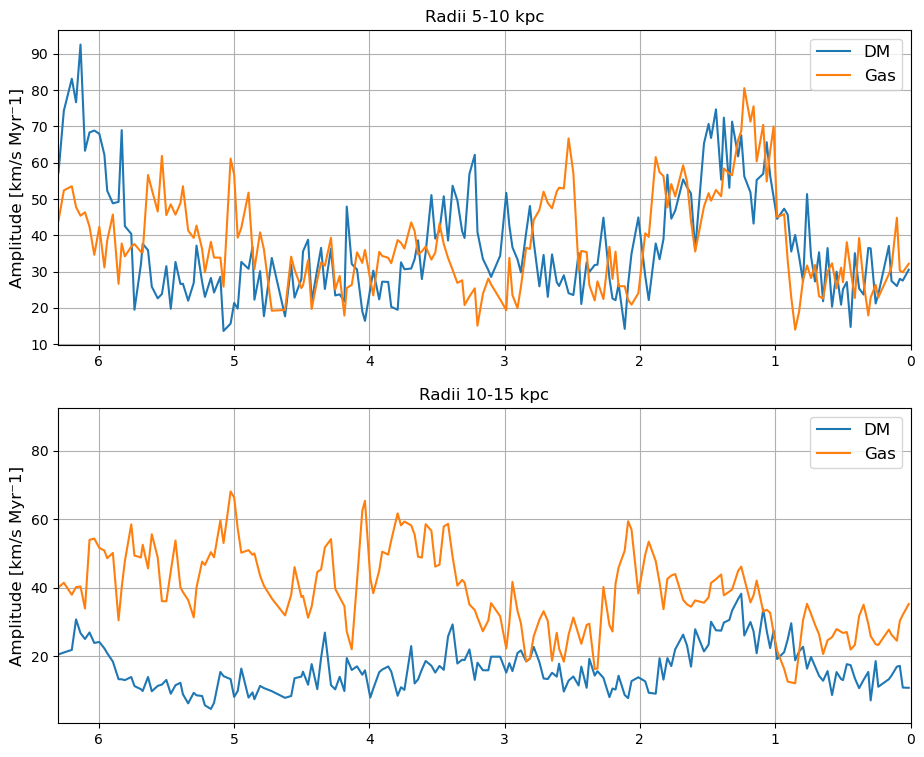

In [6]:
fig, ax = plt.subplots(nrows=2, figsize = (11,9))



ax[0].set_title("Radii 5-10 kpc")

ax[0].plot(df10["Lookback"], df10["DM"],label = "DM")
ax[0].plot(df10["Lookback"],df10["Gas"],label = "Gas")

#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [km/s Myr⁻1]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(6.3,0)
#ax[1].set_ylim(0.,0.15)
ax[0].legend(fontsize = 12)


ax[1].set_title("Radii 10-15 kpc")

ax[1].plot(df15["Lookback"],df15["DM"],label = "DM")
ax[1].plot(df15["Lookback"],df15["Gas"],label = "Gas")

#axplot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [km/s Myr⁻1]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(6.3,0)
#ax[0].set_ylim(0.1,5)
ax[1].legend(fontsize = 12)




#plt.savefig("results/Z_VZ_fourier_shells.png", dpi = 100, facecolor = "white")



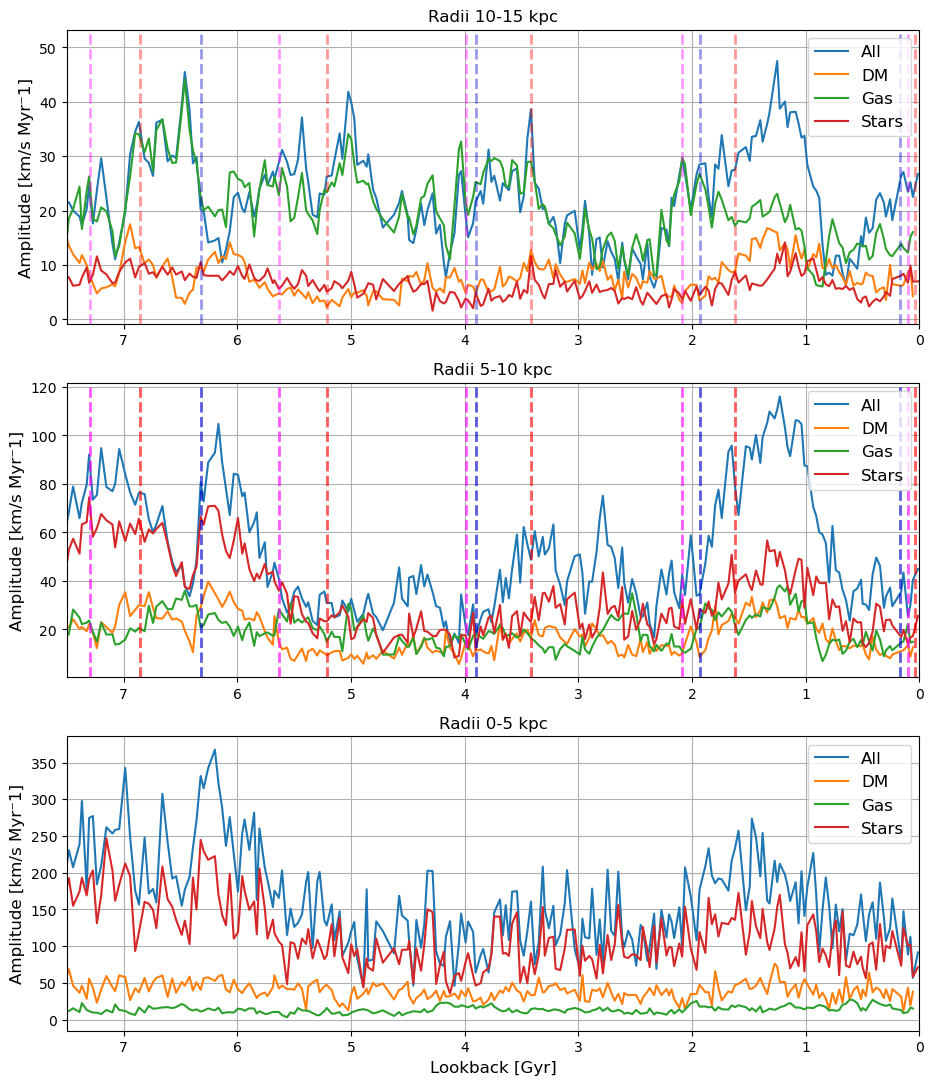

In [13]:

fig, ax = plt.subplots(nrows=3, figsize = (11,13))
ax[0].set_title("Radii 10-15 kpc")
ax[0].plot(df15["Lookback"],df15["All"],label = "All")
ax[0].plot(df15["Lookback"],df15["DM"],label = "DM")
ax[0].plot(df15["Lookback"],df15["Gas"],label = "Gas")
ax[0].plot(df15["Lookback"],df15["Stars"],label = "Stars")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [km/s Myr⁻1]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(7.5,0)
#ax[0].set_ylim(0.1,5)
ax[0].legend(fontsize = 12)
add_satellites(ax[0])

ax[1].set_title("Radii 5-10 kpc")
ax[1].plot(df10["Lookback"],df10["All"],label = "All")
ax[1].plot(df10["Lookback"], df10["DM"],label = "DM")
ax[1].plot(df10["Lookback"],df10["Gas"],label = "Gas")
ax[1].plot(df10["Lookback"],df10["Stars"],label = "Stars")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [km/s Myr⁻1]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(7.5,0)
#ax[1].set_ylim(0.,0.15)
ax[1].legend(fontsize = 12)
add_satellites(ax[1])


ax[2].set_title("Radii 0-5 kpc")
ax[2].plot(df5["Lookback"],df5["All"],label = "All")
ax[2].plot(df5["Lookback"],df5["DM"],label = "DM")
ax[2].plot(df5["Lookback"],df5["Gas"],label = "Gas")
ax[2].plot(df5["Lookback"],df5["Stars"],label = "Stars")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax[2].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[2].set_ylabel('Amplitude [km/s Myr⁻1]', fontsize = 12)
ax[2].grid()
ax[2].set_xlim(7.5,0)
#ax[1].set_ylim(0.,0.15)
ax[2].legend(fontsize = 12)
add_satellites(ax[1])
#plt.savefig("results/Z_VZ_fourier_shells.png", dpi = 100, facecolor = "white")



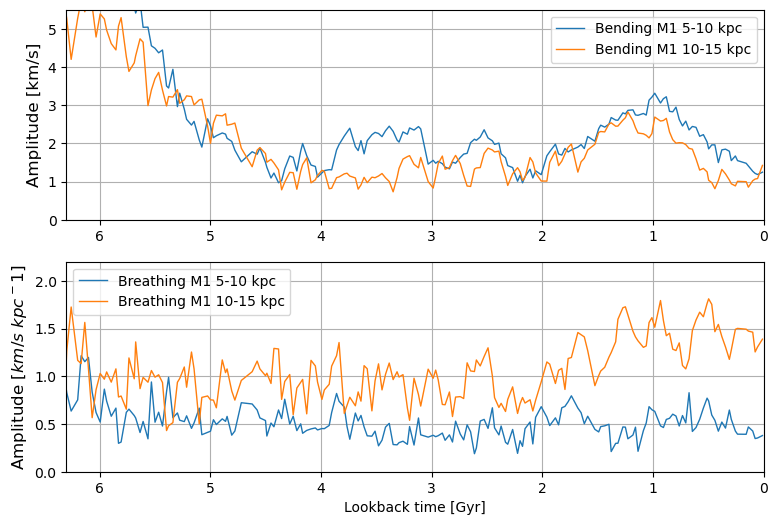

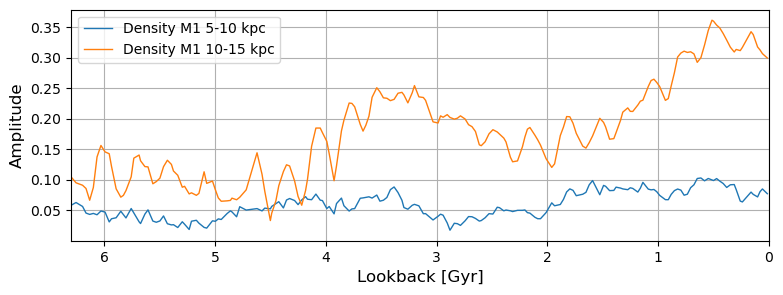

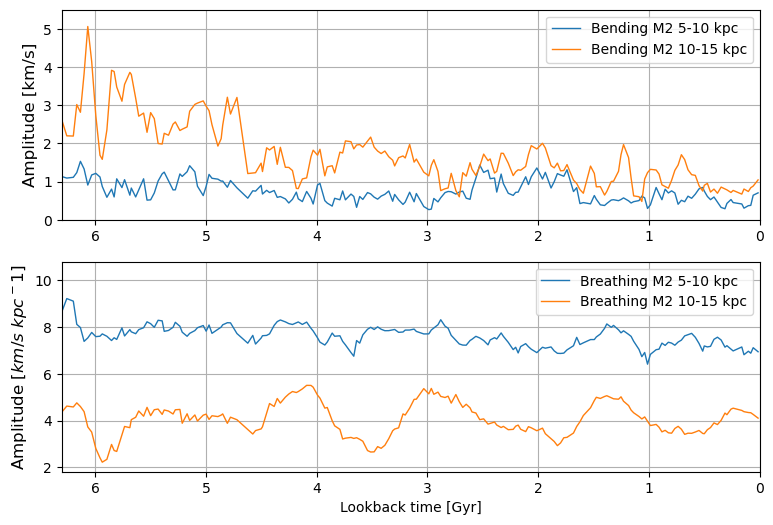

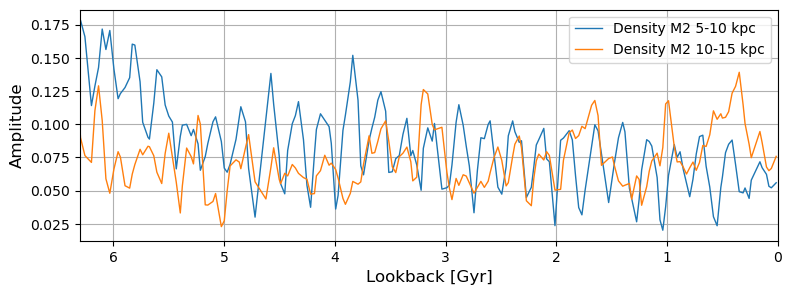

In [83]:

fig, ax = plt.subplots(nrows=2, figsize = (9,6))
ax[0].plot(df15_all["Lookback"],df10_all["Bending"],label = "Bending M1 5-10 kpc", lw=1)
ax[0].plot(df15_all["Lookback"],df15_all["Bending"],label = "Bending M1 10-15 kpc", lw=1)

ax[0].set_ylabel('Amplitude [km/s]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(6.3,0)
ax[0].set_ylim(0,5.5)
ax[0].legend(fontsize = 10)
#add_satellites(ax[1])


ax[1].plot(df15_all["Lookback"],df10_all["Breathing"],label = "Breathing M1 5-10 kpc", lw = 1)
ax[1].plot(df15_all["Lookback"],df15_all["Breathing"],label = "Breathing M1 10-15 kpc", lw = 1)

ax[1].set_ylabel('Amplitude [$km/s$ $kpc^-1$]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(6.3,0)
ax[1].set_ylim(0,2.2)
ax[1].legend(fontsize = 10)

ax[1].set_xlabel ("Lookback time [Gyr]")
plt.savefig("results/bending_breathing_fourier_shells.png", dpi = 100, facecolor = "white",bbox_inches = "tight")

fig, ax = plt.subplots(figsize = (9,3))
ax.plot(df15_all["Lookback"],df10_all["density"],label = "Density M1 5-10 kpc", lw = 1)
ax.plot(df15_all["Lookback"],df15_all["density"],label = "Density M1 10-15 kpc",lw = 1)

ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude', fontsize = 12)
ax.grid()
ax.set_xlim(6.3,0)
#ax.set_ylim(0.,0.3)
ax.legend(fontsize = 10)
plt.savefig("results/density_fourier_shells.png", dpi = 100, facecolor = "white",   bbox_inches='tight')

fig, ax = plt.subplots(nrows=2, figsize = (9,6))
ax[0].plot(df15_all["Lookback"],df10_all["BendingM2"],label = "Bending M2 5-10 kpc", lw=1)
ax[0].plot(df15_all["Lookback"],df15_all["BendingM2"],label = "Bending M2 10-15 kpc", lw=1)

ax[0].set_ylabel('Amplitude [km/s]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(6.3,0)
ax[0].set_ylim(0,5.5)
ax[0].legend(fontsize = 10)
#add_satellites(ax[1])


ax[1].plot(df15_all["Lookback"],df10_all["BreathingM2"],label = "Breathing M2 5-10 kpc", lw = 1)
ax[1].plot(df15_all["Lookback"],df15_all["BreathingM2"],label = "Breathing M2 10-15 kpc", lw = 1)
#ax[1].plot(df15["Lookback"],df5["Z"],label = "Z 0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [$km/s$ $kpc^-1$]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(6.3,0)
#ax[1].set_ylim(0,2.2)
ax[1].legend(fontsize = 10)
ax[1].set_xlabel ("Lookback time [Gyr]")
#add_satellites(ax[0])
plt.savefig("results/bending_breathing_m2_fourier_shells.png", dpi = 100, facecolor = "white",  bbox_inches='tight')

fig, ax = plt.subplots(figsize = (9,3))
ax.plot(df15_all["Lookback"],df10_all["densityM2"],label = "Density M2 5-10 kpc",lw = 1)
ax.plot(df15_all["Lookback"],df15_all["densityM2"],label = "Density M2 10-15 kpc",lw = 1)


ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude', fontsize = 12)
ax.grid()
ax.set_xlim(6.3,0)
#ax.set_ylim(0.,0.3)
ax.legend(fontsize = 10)

plt.savefig("results/density m2_fourier_shells.png", dpi = 100, facecolor = "white",  bbox_inches='tight')
#plt.show()

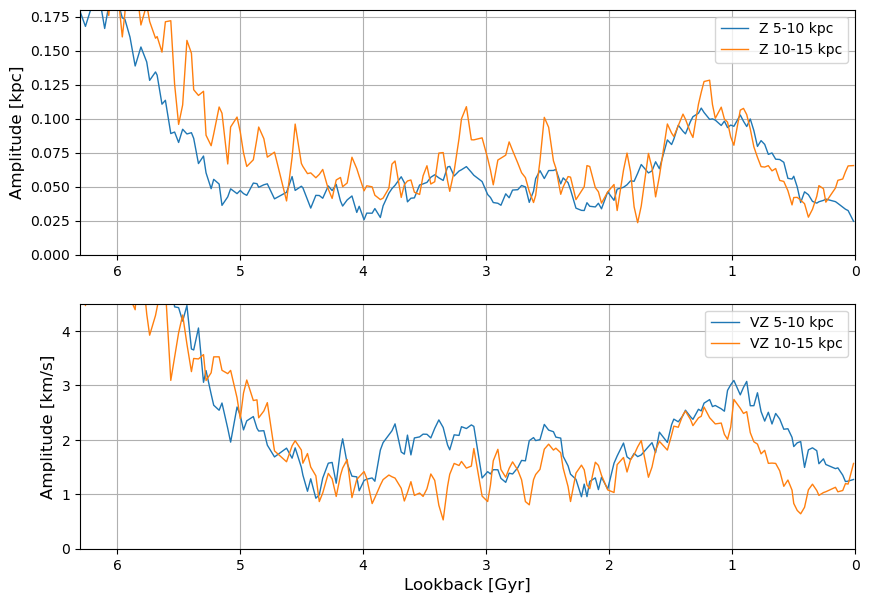

In [26]:

fig, ax = plt.subplots(nrows=2, figsize = (10,7))
ax[1].plot(df15_all_m1["Lookback"],df10_all_m1["VZ"],label = "VZ 5-10 kpc", lw=1)
ax[1].plot(df15_all_m1["Lookback"],df15_all_m1["VZ"],label = "VZ 10-15 kpc", lw=1)
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
#ax[0].plot(df5["Lookback"],df5["VZ"],label = "VZ 0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [km/s]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(6.3,0)
ax[1].set_ylim(0,4.5)
ax[1].legend(fontsize = 10)


ax[0].plot(df10_all_m1["Lookback"],df10_all_m1["Z"],label = "Z 5-10 kpc", lw = 1)
ax[0].plot(df10_all_m1["Lookback"],df15_all_m1["Z"],label = "Z 10-15 kpc", lw = 1)
#ax[1].plot(df15["Lookback"],df5["Z"],label = "Z 0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [kpc]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(6.3,0)
ax[0].set_ylim(0.,0.18)
ax[0].legend(fontsize = 10)

plt.savefig("results/Z_VZ_fourier_shells.png", dpi = 100, facecolor = "white",  bbox_inches='tight')


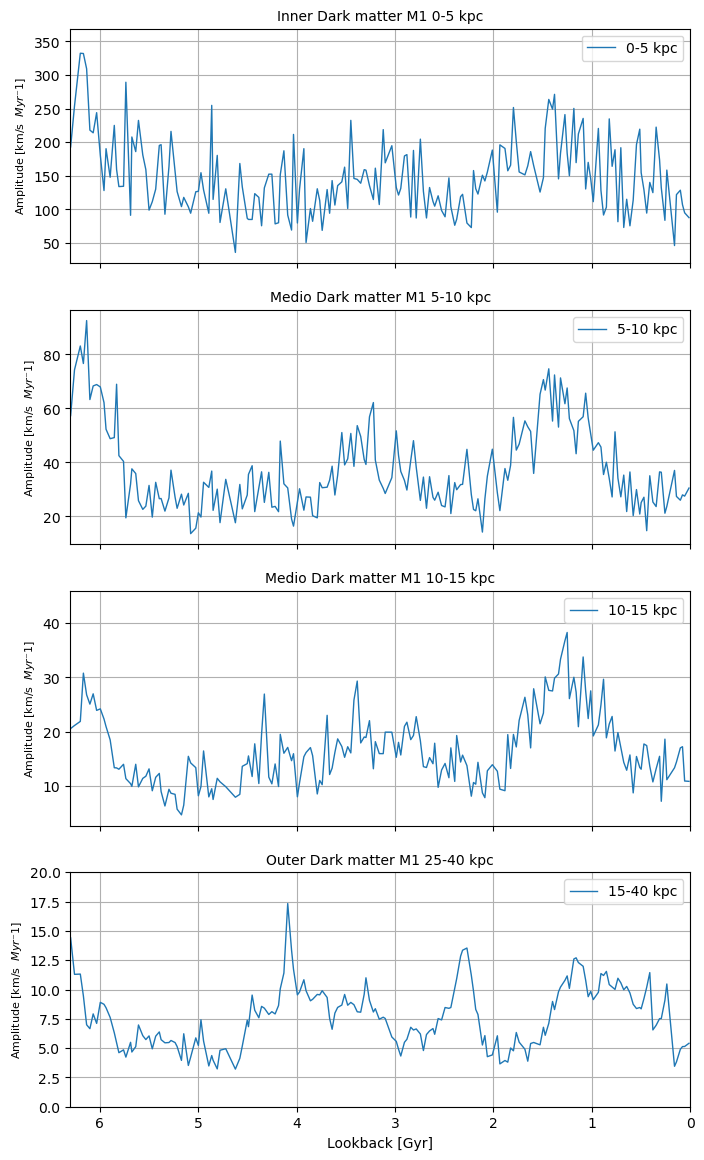

In [28]:

seconds_to_Myr = 3.15576e+16
fig, ax = plt.subplots(nrows=4, figsize = (8,14), sharex=True)
#fig, ax = plt.subplots(figsize = (8,3))
ax[0].set_title("Inner Dark matter M1 0-5 kpc", fontsize = 10)

ax[0].plot(df15_all_m1["Lookback"],df15_all_m1["DM_inner"],label = "0-5 kpc",lw=1)
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 8)
ax[0].grid()

ax[0].legend(fontsize = 10, bbox_to_anchor=(1, 1))


#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")


#fig, ax = plt.subplots(figsize = (8,3))
ax[1].set_title("Medio Dark matter M1 5-10 kpc", fontsize = 10)
ax[1].plot(df15_all_m1["Lookback"],df10_all_m1["DM"],label = "5-10 kpc",lw=1)
#ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 8)
ax[1].grid()

ax[1].legend(fontsize = 10, bbox_to_anchor=(1, 1))


ax[2].set_title("Medio Dark matter M1 10-15 kpc",fontsize = 10)
ax[2].plot(df15_all_m1["Lookback"],df15_all_m1["DM"],label = "10-15 kpc",lw=1)
#ax[2].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[2].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 8)
ax[2].grid()


ax[2].legend(fontsize = 10, bbox_to_anchor=(1, 1))



ax[3].set_title("Outer Dark matter M1 25-40 kpc", fontsize = 10)
ax[3].plot(df15_all_m1["Lookback"],df15_all_m1["DM_out"],label = "15-40 kpc",lw=1)
ax[3].set_xlabel('Lookback [Gyr]', fontsize = 10)
ax[3].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 8)
ax[3].grid()
ax[3].set_xlim(6.3,0)
ax[3].set_ylim(0,20)
ax[3].legend(fontsize = 10, bbox_to_anchor=(1, 1))
plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()

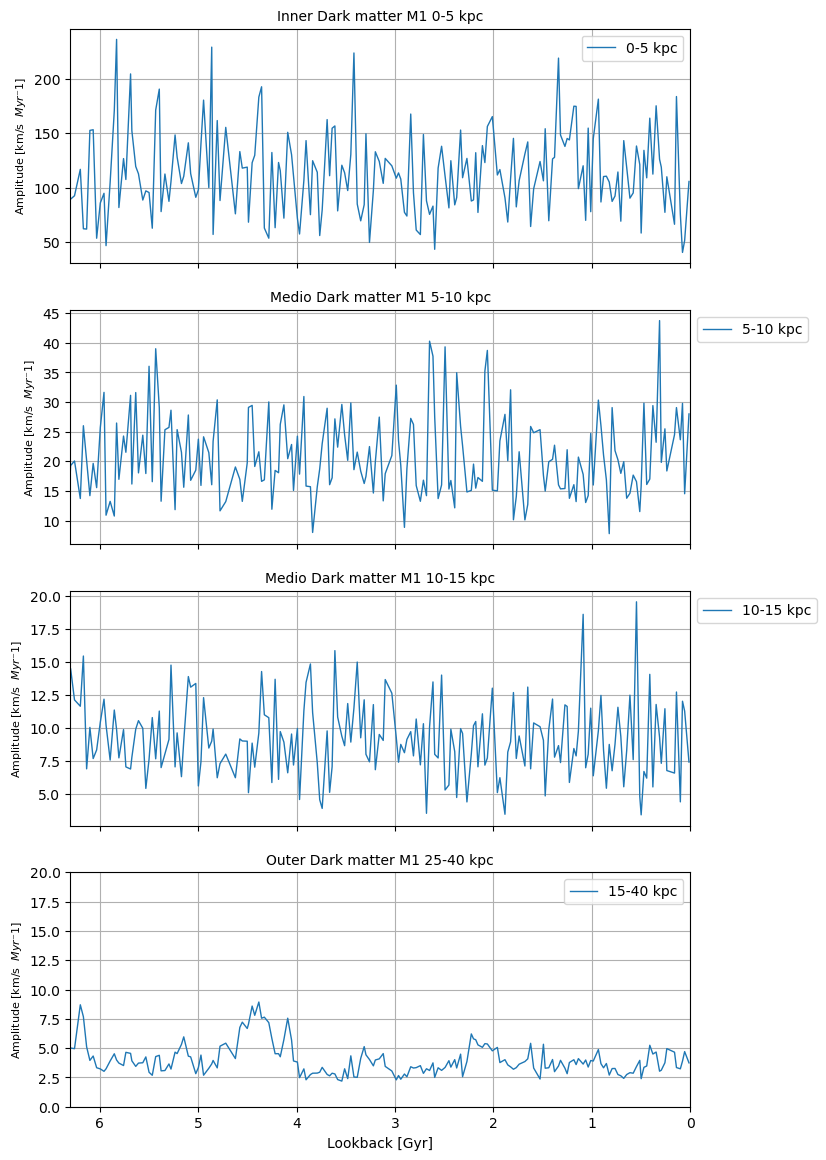

In [22]:

seconds_to_Myr = 3.15576e+16
fig, ax = plt.subplots(nrows=4, figsize = (8,14), sharex=True)
#fig, ax = plt.subplots(figsize = (8,3))
ax[0].set_title("Inner Dark matter M1 0-5 kpc", fontsize = 10)

ax[0].plot(df15_all_m2["Lookback"],df15_all_m2["DM_inner"],label = "0-5 kpc",lw=1)
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 8)
ax[0].grid()

ax[0].legend(fontsize = 10, bbox_to_anchor=(1, 1))


#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")


#fig, ax = plt.subplots(figsize = (8,3))
ax[1].set_title("Medio Dark matter M1 5-10 kpc", fontsize = 10)
ax[1].plot(df15_all_m2["Lookback"],df10_all_m2["DM"],label = "5-10 kpc",lw=1)
#ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 8)
ax[1].grid()

ax[1].legend(fontsize = 10, bbox_to_anchor=(1, 1))


ax[2].set_title("Medio Dark matter M1 10-15 kpc",fontsize = 10)
ax[2].plot(df15_all_m2["Lookback"],df15_all_m2["DM"],label = "10-15 kpc",lw=1)
#ax[2].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[2].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 8)
ax[2].grid()


ax[2].legend(fontsize = 10, bbox_to_anchor=(1, 1))



ax[3].set_title("Outer Dark matter M1 25-40 kpc", fontsize = 10)
ax[3].plot(df15_all_m2["Lookback"],df15_all_m2["DM_out"],label = "15-40 kpc",lw=1)
ax[3].set_xlabel('Lookback [Gyr]', fontsize = 10)
ax[3].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 8)
ax[3].grid()
ax[3].set_xlim(6.3,0)
ax[3].set_ylim(0,20)
ax[3].legend(fontsize = 10, bbox_to_anchor=(1, 1))
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()

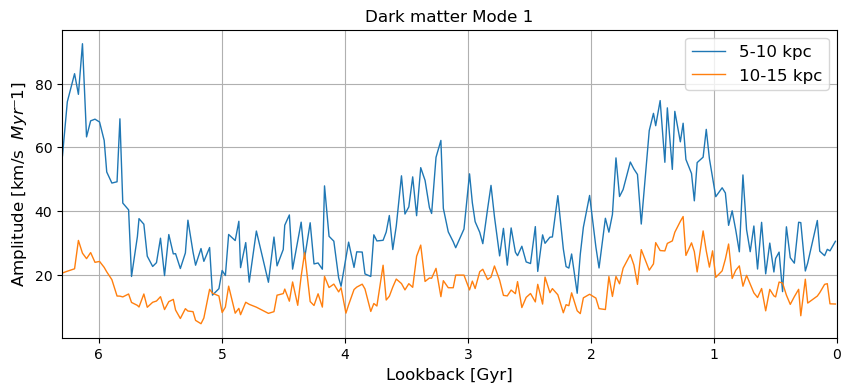

In [75]:
#vz["amp1_npart"]=vz["amp2"]/vz["Nparticles"]
#z["amp1_npart"]=z["amp2"]/z["Nparticles"]
#density["amp1_npart"]=density["amp2"]/density["Nparticles"]
seconds_to_Myr = 3.15576e+16

fig, ax = plt.subplots(figsize = (10,4))
plt.title("Dark matter Mode 1")
ax.plot(df10_all["Lookback"],df10_all["DM"],label = "5-10 kpc",lw=1)
ax.plot(df15_all["Lookback"],df15_all["DM"],label = "10-15 kpc", lw =1)

#ax.plot(df_outer["Lookback"],df_outer["DM"],label = "25-40 kpc")
#ax.plot(df5["Lookback"],df5["DM"],label = "0-5 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(6.3,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
#add_satellites(ax)
#fig.savefig("test.png")
plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



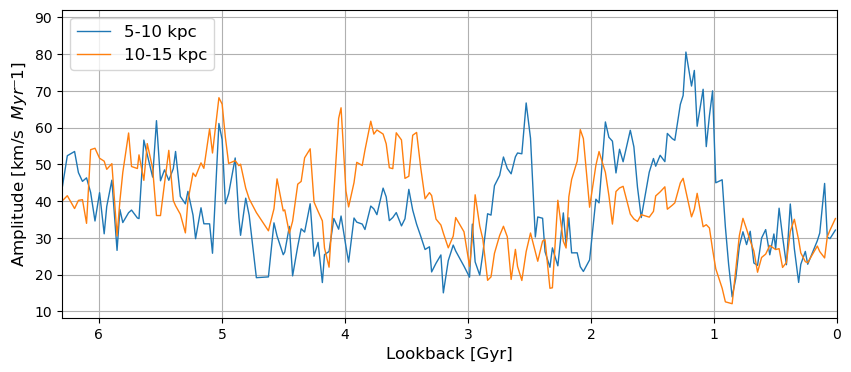

In [77]:

    
fig, ax = plt.subplots(figsize = (10,4))


ax.plot(df10_all["Lookback"],df10_all["Gas"],label = "5-10 kpc", lw = 1)
ax.plot(df15_all["Lookback"],df15_all["Gas"],label = "10-15 kpc", lw =1)

#ax.plot(lookback,np.array(ac_gas_estimator_5)*seconds_to_Myr,label = "gas_acceleration  0-5kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(6.3,0)
ax.legend(fontsize = 12)
#add_satellites(ax)
plt.savefig("results/Gas_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



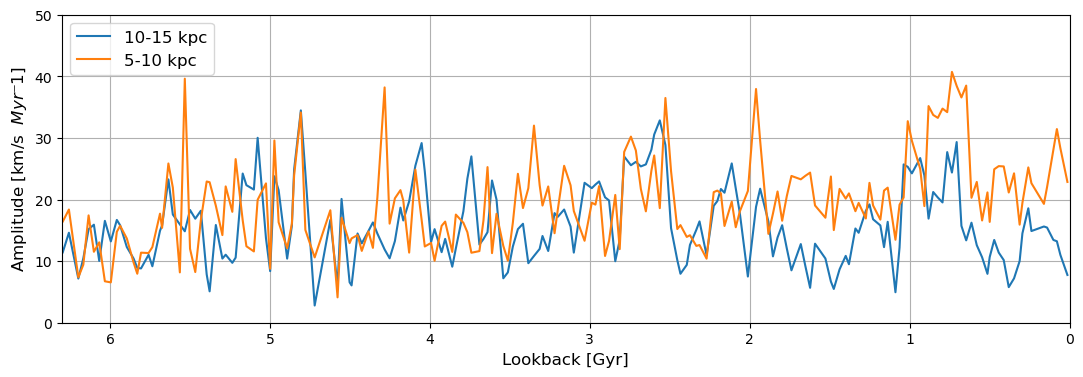

In [38]:

    
fig, ax = plt.subplots(figsize = (13,4))
ax.plot(df15_all_m2["Lookback"],df15_all_m2["Gas"],label = "10-15 kpc")
ax.plot(df10_all_m2["Lookback"],df10_all_m2["Gas"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_gas_estimator_5)*seconds_to_Myr,label = "gas_acceleration  0-5kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(6.3,0)
ax.set_ylim(-0,50)
ax.legend(fontsize = 12)

#plt.savefig("results/Gas_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



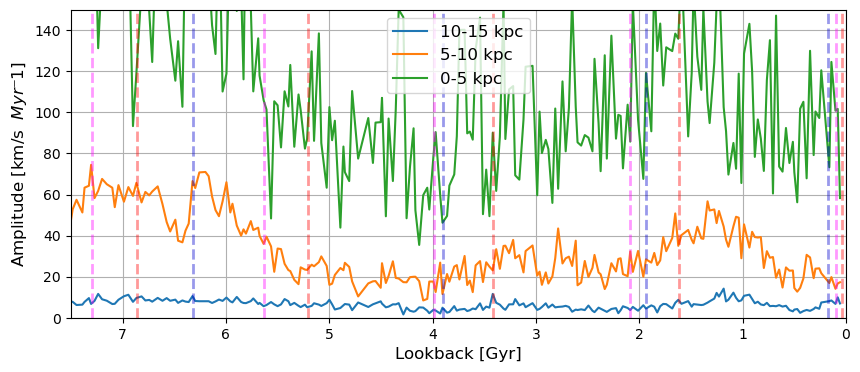

In [96]:

seconds_to_Myr = 3.15576e+16
 
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(df15["Lookback"],df15["Stars"],label = "10-15 kpc")
ax.plot(df10["Lookback"],df10["Stars"],label = "5-10 kpc")
ax.plot(df10["Lookback"],df5["Stars"],label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.set_ylim(0,150)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()



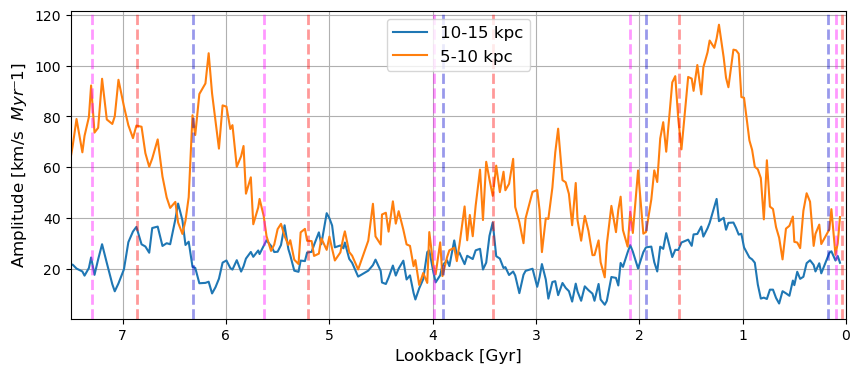

In [101]:

seconds_to_Myr = 3.15576e+16
 
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(df15["Lookback"],df15["All"],label = "10-15 kpc")
ax.plot(df10["Lookback"],df10["All"],label = "5-10 kpc")
#ax.plot(df10["Lookback"],df5["All"],label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
#ax.set_ylim(0,150)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()

In [18]:
ac_sat_arania = pd.read_csv(path_results + f"fourier_40_az_core_sat_prog_arania.csv", sep = ",")
ac_stream_arania = pd.read_csv(path_results + f"fourier_40_az_stream_sat_streams_arania.csv", sep = ",")

In [19]:
print(ac_stream_arania)

      snapshot_t  lookbacktime  Rcenters  Nparticles          amp0  \
0          520.0      7.641375       0.5         0.0  0.000000e+00   
1          520.0      7.641375       1.5        12.0  0.000000e+00   
2          520.0      7.641375       2.5        28.0  0.000000e+00   
3          520.0      7.641375       3.5        36.0  0.000000e+00   
4          520.0      7.641375       4.5        40.0  0.000000e+00   
...          ...           ...       ...         ...           ...   
8995       999.0      0.013209      35.5       348.0  1.958462e-15   
8996       999.0      0.013209      36.5       352.0  2.034152e-15   
8997       999.0      0.013209      37.5       372.0  2.163625e-15   
8998       999.0      0.013209      38.5       372.0  2.164891e-15   
8999       999.0      0.013209      39.5       340.0  1.959028e-15   

              amp1          amp2  phase0    phase1    phase2  
0     0.000000e+00  0.000000e+00     0.0  0.000000  0.000000  
1     0.000000e+00  0.000000e+00 

In [27]:

variables = [ "Satelites","Streams"]
variables_acc = [  "Satelites","Streams"]
rings = ["5", "10", "15"]
estimator_5 = {}
estimator_10 = {}
estimator_15 = {}
#generation of dictionary
estimator_5["Lookback"] = []
estimator_10["Lookback"] = []
estimator_15["Lookback"] = []
for var1 in variables:
    estimator_5[f"{var1}"] = []
    estimator_10[f"{var1}"] = []
    estimator_15[f"{var1}"] = []
    
data_frames = [ ac_sat_arania, ac_stream_arania]

def create_estimator(df, var_name):
    df_5 = df[(df["Rcenters"]<5)&(df["Rcenters"]>0)]
    df_10 = df[(df["Rcenters"]<10)&(df["Rcenters"]>5)]
    df_15 = df[(df["Rcenters"]<15)&(df["Rcenters"]>10)]
    for i,snapshot in enumerate(snapshots_analysis):
        
        df_i = df_15[df_15["snapshot_t"]==snapshot]
        estimator_15[f"{var_name}"].append(np.mean(df_i["amp1"]/df_i["Nparticles"]))
        df_i = df_10[df_10["snapshot_t"]==snapshot]
        estimator_10[f"{var_name}"].append(np.mean(df_i["amp1"]/df_i["Nparticles"]))
        df_i = df_5[df_5["snapshot_t"]==snapshot]
        estimator_5[f"{var_name}"].append(np.mean(df_i["amp1"]/df_i["Nparticles"]))
        
for i, data in enumerate(data_frames):
    create_estimator(data,variables[i])
for i,snapshot in enumerate(snapshots_analysis):
    lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    estimator_5["Lookback"].append(lb)
    estimator_10["Lookback"].append(lb)
    estimator_15["Lookback"].append(lb)
for var in variables_acc:
    estimator_5[f"{var}"] = np.array(estimator_5[f"{var}"])*seconds_to_Myr
    estimator_10[f"{var}"] = np.array(estimator_10[f"{var}"])*seconds_to_Myr
    estimator_15[f"{var}"] = np.array(estimator_15[f"{var}"])*seconds_to_Myr
    
    
df15_sat_m1 = pd.DataFrame(data=estimator_15)
#df10_all_m1 = pd.DataFrame(data=estimator_10)
#df5_all_m1 = pd.DataFrame(data=estimator_5)    


estimator_outer = {}


df_sat_outer = ac_sat[(ac_sat["Rcenters"]>15)]
df_streams_outer = ac_streams[(ac_streams["Rcenters"]>15)]
#df_dm_10 = ac_dm[(ac_dm["Rcenters"]>5)&(ac_dm["Rcenters"]<10)]
#df_dm_15 = ac_dm[(ac_dm["Rcenters"]>10)&(ac_dm["Rcenters"]<15)]
estimator_outer["Lookback"] = []
estimator_outer["Sat"] = []
estimator_outer["Streams"] = []
#estimator_inner["DM"] = []
for i,snapshot in enumerate(snapshots_analysis):

    df_i = df_sat_outer[df_sat_outer["snapshot_t"]==snapshot]
    estimator_outer[f"Sat"].append(np.mean(df_i["amp1"]/df_i["Nparticles"]))

    df_i = df_streams_outer[df_streams_outer["snapshot_t"]==snapshot]
    estimator_outer[f"Streams"].append(np.mean(df_i["amp1"]/df_i["Nparticles"]))
    
for i,snapshot in enumerate(snapshots_analysis):
    lb = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    estimator_outer["Lookback"].append(lb)


df15_sat_m1[f"Sat_out"] = np.array(estimator_outer[f"Sat"])*seconds_to_Myr

df15_sat_m1[f"Streams_out"] = np.array(estimator_outer[f"Streams"])*seconds_to_Myr

  

In [21]:
df15_sat_m1

Lookback     Satelites       Streams    DM_out
0    7.641375  1.953906e-07  0.000000e+00  0.000148
1    7.596713  3.131887e-07  1.794686e-06  0.000225
2    7.566684  4.074406e-06  4.682986e-07  0.000083
3    7.533391  4.147162e-05  1.406841e-05  0.000295
4    7.482980  2.894717e-04  2.552394e-05  0.000777
..        ...           ...           ...       ...
220  0.140454  2.685635e-01  9.317566e-02  0.534920
221  0.100925  2.417670e-01  9.650381e-02  0.553269
222  0.079098  2.173673e-01  9.745825e-02  0.586081
223  0.057232  1.886468e-01  9.815439e-02  0.649404
224  0.013209  1.276618e-01  1.019980e-01       NaN

[225 rows x 4 columns]

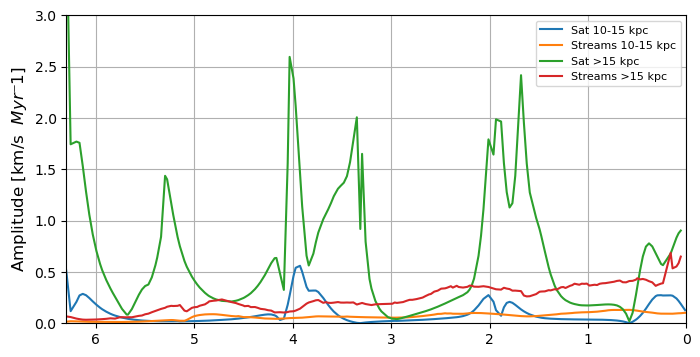

In [32]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True,figsize = (8,4))
fig.subplots_adjust(hspace=0.15, wspace=0)

#fig, ax = plt.subplots(figsize = (10,4))
ax.plot(df15_sat_m1["Lookback"],df15_sat_m1["Satelites"],label = "Sat 10-15 kpc")
ax.plot(df15_sat_m1["Lookback"],df15_sat_m1["Streams"],label = "Streams 10-15 kpc")
ax.plot(df15_sat_m1["Lookback"],df15_sat_m1["Sat_out"],label = "Sat >15 kpc")
ax.plot(df15_sat_m1["Lookback"],df15_sat_m1["Streams_out"],label = "Streams >15 kpc")
#ax.plot(df15_sat_m1["Lookback"],df15_sat_m1["Satelites"],label = "Mosquito acceleration 10-15 kpc", color = "magenta")


#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")

ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()

ax.set_xlim(6.3,0)
ax.set_ylim(0,3)
ax.legend(fontsize = 8)

#fig.savefig("test.png")
#plt.savefig("results/satelites_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()

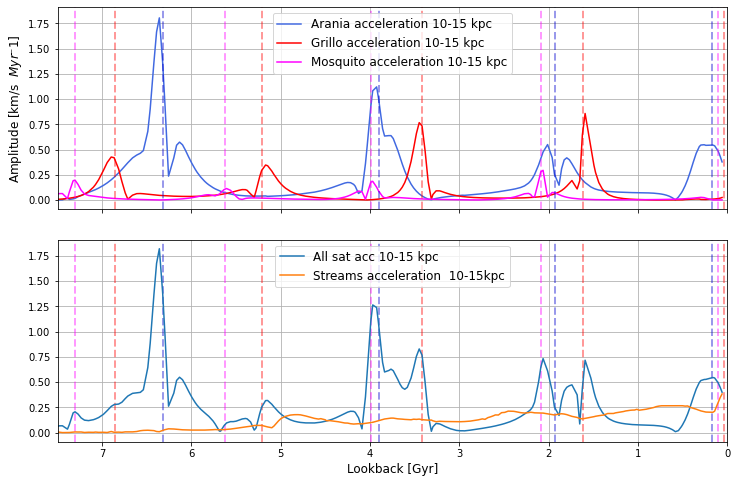

In [28]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)

#fig, ax = plt.subplots(figsize = (10,4))
ax[0].plot(lookback,ac_arania_estimator_15)*seconds_to_Myr,label = "Arania acceleration 10-15 kpc", color = "royalblue")
ax[0].plot(lookback,np.array(ac_grillo_estimator_15)*seconds_to_Myr,label = "Grillo acceleration 10-15 kpc", color = "red")
ax[0].plot(lookback,np.array(ac_mosquito_estimator_15)*seconds_to_Myr,label = "Mosquito acceleration 10-15 kpc", color = "magenta")


#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")

ax[0].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax[0].grid()

ax[0].set_xlim(7.5,0)
#ax.set_ylim(0,40000)
ax[0].legend(fontsize = 12)
add_satellites(ax[0])
add_satellites(ax[1])

ax[1].plot(lookback,np.array(ac_sat_estimator_15)*seconds_to_Myr,label = "All sat acc 10-15 kpc")
ax[1].plot(lookback,np.array(ac_streams_estimator_15)*seconds_to_Myr,label = "Streams acceleration  10-15kpc")
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].grid()
ax[1].legend(fontsize = 12)
#fig.savefig("test.png")
#plt.savefig("results/satelites_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()

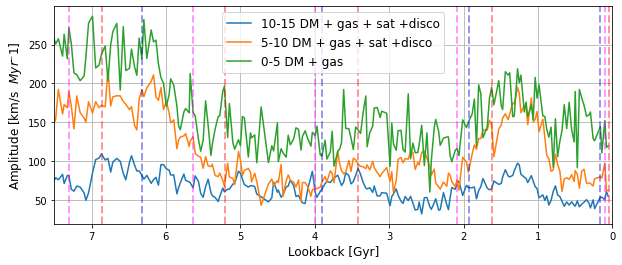

In [17]:
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_gas_estimator_15)*seconds_to_Myr +np.array(ac_dm_estimator_15)*seconds_to_Myr +np.array(ac_sat_estimator_15)*seconds_to_Myr
        +np.array(ac_disk_estimator_15)*seconds_to_Myr,label = "10-15 DM + gas + sat +disco")
ax.plot(lookback,np.array(ac_gas_estimator_10)*seconds_to_Myr +np.array(ac_dm_estimator_10)*seconds_to_Myr + np.array(ac_sat_estimator_10)*seconds_to_Myr
        +np.array(ac_disk_estimator_10)*seconds_to_Myr,label = "5-10 DM + gas + sat +disco")
ax.plot(lookback,np.array(ac_gas_estimator_5)*seconds_to_Myr +np.array(ac_dm_estimator_5)*seconds_to_Myr+np.array(ac_disk_estimator_5)*seconds_to_Myr ,label = "0-5 DM + gas")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
#ax.set_ylim(0,100)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()

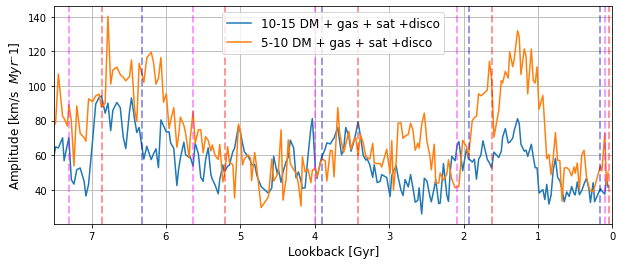

In [15]:
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_gas_estimator_15)*seconds_to_Myr +np.array(ac_dm_estimator_15)*seconds_to_Myr,label = "10-15 DM + gas + sat +disco")
ax.plot(lookback,np.array(ac_gas_estimator_10)*seconds_to_Myr +np.array(ac_dm_estimator_10)*seconds_to_Myr ,label = "5-10 DM + gas + sat +disco")
#ax.plot(lookback,np.array(ac_gas_estimator_5)*seconds_to_Myr +np.array(ac_dm_estimator_5)*seconds_to_Myr ,label = "0-5 DM + gas")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
#ax.set_ylim(0,100)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()

In [24]:
#Epoch 1
cortes = [2.5, 4.8]
indr=np.digitize(lookback,cortes)
print(indr)

In [43]:
epoch1_15 = df15.loc[indr==2]
epoch1_10 = df10.loc[indr==2]
epoch1_5 = df5.loc[indr==2]

In [ ]:
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_disk_estimator_15)*seconds_to_Myr[indr==2],label = "disk acceleration 10-15 kpc")
ax.plot(lookback,np.array(ac_disk_estimator_10)*seconds_to_Myr,label = "disk_acceleration  5-10kpc")
ax.plot(lookback,np.array(ac_disk_estimator_5)*seconds_to_Myr,label = "disk_acceleration  0-5kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.set_ylim(0,150)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()

In [12]:
from scipy import stats
from minepy import MINE
mine = MINE(alpha=0.6, c=15, est="mic_approx")
def print_stats(mine):
    print ("MIC", mine.mic())
    print ("MAS", mine.mas())
    print ("MEV", mine.mev())
    print ("MCN (eps=0)", mine.mcn(0))
    print ("MCN (eps=1-MIC)", mine.mcn_general())
    print ("GMIC", mine.gmic())
    print ("TIC", mine.tic())



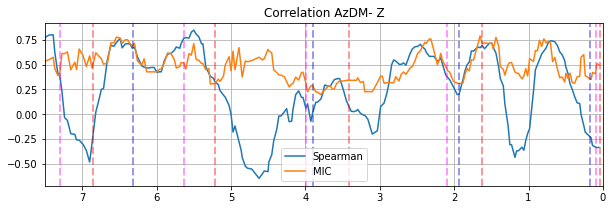

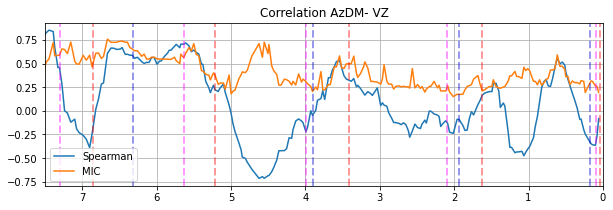

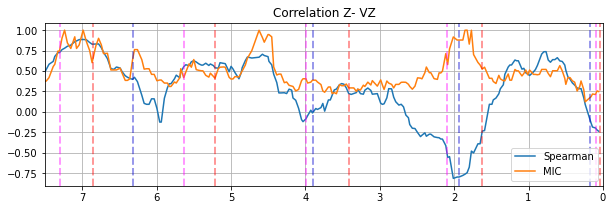

In [25]:
window = 0.8 #Gyr
cor_z_tot = []
cor_vz_tot = []
mic_z_tot = []
mic_vz_tot = []
lookback_tot = []

cor_z_vz = []
mic_z_vz = []
for lb in d15["Lookback"]:
    df_w1 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    cor_vz=stats.spearmanr(df_w1["VZ"],df_w1["DM"])
    cor_z=stats.spearmanr(df_w1["Z"],df_w1["DM"])
    cor = stats.spearmanr(df_w1["Z"],df_w1["VZ"])


    cor_z_tot.append(cor_z.correlation)
    cor_vz_tot.append(cor_vz.correlation)
    cor_z_vz.append(cor.correlation)
    
    mine.compute_score(df_w1["VZ"],df_w1["DM"])
    mic_vz = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["DM"])
    mic_z = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["VZ"])
    mic = mine.mic()
    
    mic_z_tot.append(mic_z)
    mic_vz_tot.append(mic_vz)
    mic_z_vz.append(mic)
    
fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation AzDM- Z")
ax.plot(lookback,cor_z_tot,label = "Spearman")
ax.plot(lookback,mic_z_tot,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation AzDM- VZ")
ax.plot(lookback,cor_vz_tot,label = "Spearman")
ax.plot(lookback,mic_vz_tot,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation Z- VZ")
ax.plot(lookback,cor_z_vz,label = "Spearman")
ax.plot(lookback,mic_z_vz,label = "MIC")
ax.set_xlim(7.5,0)
add_satellites(ax)
ax.grid()
ax.legend()
plt.show()   

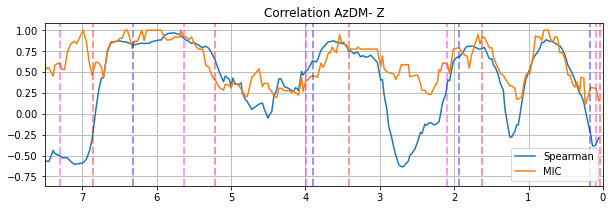

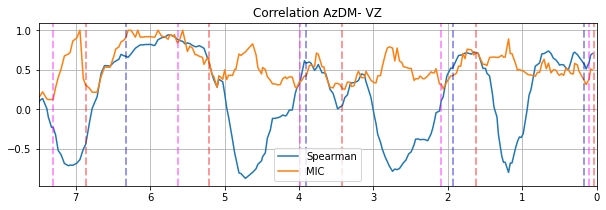

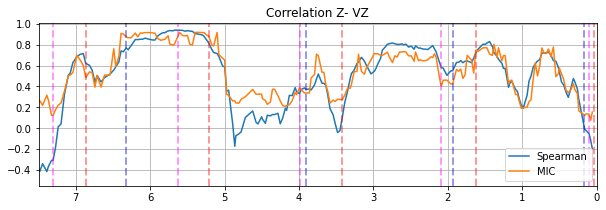

In [26]:
window = 0.8 #Gyr
cor_z_tot = []
cor_vz_tot = []
mic_z_tot = []
mic_vz_tot = []
lookback_tot = []

cor_z_vz = []
mic_z_vz = []
for lb in d15["Lookback"]:
    df_w1 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    cor_vz=stats.spearmanr(df_w1["VZ"],df_w1["DM"])
    cor_z=stats.spearmanr(df_w1["Z"],df_w1["DM"])
    cor = stats.spearmanr(df_w1["Z"],df_w1["VZ"])


    cor_z_tot.append(cor_z.correlation)
    cor_vz_tot.append(cor_vz.correlation)
    cor_z_vz.append(cor.correlation)
    
    mine.compute_score(df_w1["VZ"],df_w1["DM"])
    mic_vz = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["DM"])
    mic_z = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["VZ"])
    mic = mine.mic()
    
    mic_z_tot.append(mic_z)
    mic_vz_tot.append(mic_vz)
    mic_z_vz.append(mic)
    
fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation AzDM- Z")
ax.plot(lookback,cor_z_tot,label = "Spearman")
ax.plot(lookback,mic_z_tot,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation AzDM- VZ")
ax.plot(lookback,cor_vz_tot,label = "Spearman")
ax.plot(lookback,mic_vz_tot,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation Z- VZ")
ax.plot(lookback,cor_z_vz,label = "Spearman")
ax.plot(lookback,mic_z_vz,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()   

In [95]:
df_w1 = df15[(df15["Lookback"]<7)&(df15["Lookback"]>6.0)]
spearman=stats.spearmanr(df_w1["VZ"],df_w1["DM"])
print(spearman)
mine.compute_score(df_w1["VZ"],df_w1["DM"])
print_stats(mine)

SpearmanrResult(correlation=0.6136752136752136, pvalue=0.0008554003437982895)
MIC 0.7105991233834824
MAS 0.12624743234453595
MEV 0.7105991233834824
MCN (eps=0) 2.584962500721156
MCN (eps=1-MIC) 2.0
GMIC 0.6976678338339877
TIC 1.9681184067957527


In [97]:
spearman.correlation

0.6136752136752136

In [66]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [67]:
#df15.drop('Lookback', inplace=True, axis=1)
#df15.drop('density', inplace=True, axis=1)


df10.drop('Lookback', inplace=True, axis=1)
df10.drop('density', inplace=True, axis=1)
df10.drop('Sat', inplace=True, axis=1)

[[ 0.52261771  0.61926718  0.5859854 ]
 [-0.82726954  0.20215349  0.52417465]
 [-0.20614516  0.75871083 -0.61794987]]
------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.81969699 0.97827509 1.        ]


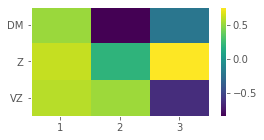

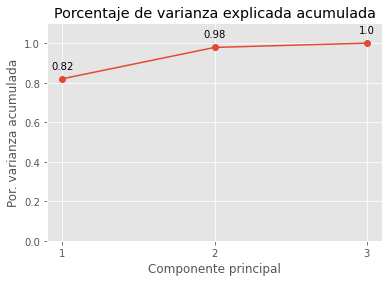

In [70]:
datos = df10
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']


# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3']
)

print(modelo_pca.components_)
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44846498 0.7035825  0.89430963 0.98431903 1.        ]


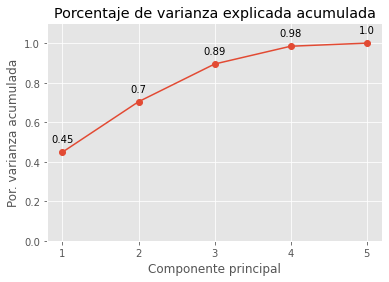

In [143]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df10.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df10.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

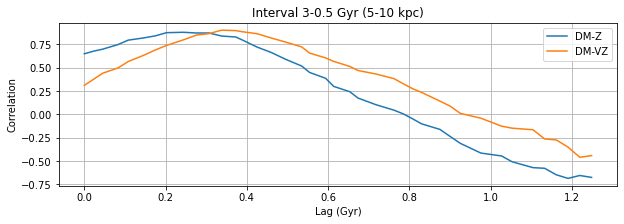

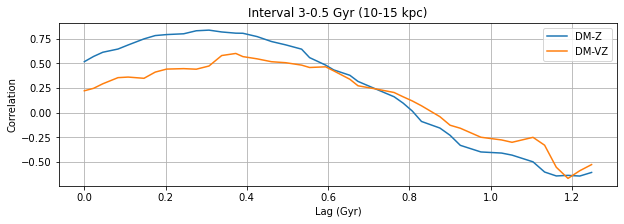

In [15]:
#TEMPORAL CROSS CORRELATION
#Cross correlation
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))
df_w = df10[(df10["Lookback"]<3)&(df10["Lookback"]>0.5)]
lag = []
cor_z = []
cor_vz= []
z_vz = []
for i in range(40):
    lb = df_w["Lookback"].iloc[0] - df_w["Lookback"].iloc[i]
    lag.append(lb)
    #print(f"Lag of {lb:.2f} Gyr aprox")
    res_vz = crosscorr(df_w["VZ"], df_w["DM"], lag=i)
    cor_vz.append(res_vz)
    res_z = crosscorr(df_w["Z"], df_w["DM"], lag=i)
    cor_z.append(res_z)
    z_vz.append(crosscorr(df_w["Z"], df_w["VZ"], lag=i))
fig, ax = plt.subplots(figsize = (10,3))

ax.plot(lag,cor_z,label = "DM-Z")
ax.plot(lag,cor_vz,label = "DM-VZ")
ax.set_ylabel("Correlation")
ax.set_xlabel("Lag (Gyr)")
ax.set_title("Interval 3-0.5 Gyr (5-10 kpc)")
ax.grid()
ax.legend()

plt.show() 


df_w = df15[(df15["Lookback"]<3)&(df15["Lookback"]>0.5)]
lag = []
cor_z = []
cor_vz= []
z_vz = []
for i in range(40):
    lb = df_w["Lookback"].iloc[0] - df_w["Lookback"].iloc[i]
    lag.append(lb)
    #print(f"Lag of {lb:.2f} Gyr aprox")
    res_vz = crosscorr(df_w["VZ"], df_w["DM"], lag=i)
    cor_vz.append(res_vz)
    res_z = crosscorr(df_w["Z"], df_w["DM"], lag=i)
    cor_z.append(res_z)
    z_vz.append(crosscorr(df_w["Z"], df_w["VZ"], lag=i))
fig, ax = plt.subplots(figsize = (10,3))

ax.plot(lag,cor_z,label = "DM-Z")
ax.plot(lag,cor_vz,label = "DM-VZ")
ax.set_title("Interval 3-0.5 Gyr (10-15 kpc)")
ax.set_ylabel("Correlation")
ax.set_xlabel("Lag (Gyr)")
ax.grid()
ax.legend()

plt.show()   

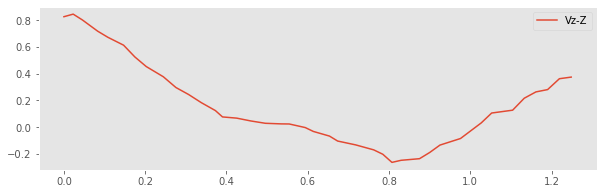

In [82]:
fig, ax = plt.subplots(figsize = (10,3))

ax.plot(lag,z_vz,label = "Vz-Z")


ax.grid()
ax.legend()

plt.show()   

In [62]:
window = 0.8 #Gyr
cor_z_tot = []
cor_vz_tot = []
mic_z_tot = []
mic_vz_tot = []
lookback_tot = []
for lb in df10["Lookback"]:
    df_w1 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    cor_vz=stats.spearmanr(df_w1["VZ"],df_w1["DM"])
    cor_z=stats.spearmanr(df_w1["Z"],df_w1["DM"])
    cor = stats.spearmanr(df_w1["Z"],df_w1["VZ"])

    cor_z_tot.append(cor_z.correlation)
    cor_vz_tot.append(cor_vz.correlation)

    
    mine.compute_score(df_w1["VZ"],df_w1["DM"])
    mic_vz = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["DM"])
    mic_z = mine.mic()

    mic_z_tot.append(mic_z)
    mic_vz_tot.append(mic_vz)
    lookback_tot.append(lb)
    fig, ax = plt.subplot_mosaic(
        [["top left", "top left", "top left", "top right"],
         ["center left", "center left","center left", "center right"],
         ["bottom row", "bottom row", "bottom row", "bottom right"],
         ["bb row", "bb row", "bb row", "bb right"]
        ], figsize=(14, 14))
    ax["top left"].set_title("Correlation az (DM)-Z (disk)")
    ax["bottom row"].set_title("Correlation az (DM)-Vz (disk)")
    
    ax["top left"].plot(df10["Lookback"],df10["Z"],label = "Z")
    ax[0] =ax["top left"].twinx()
    ax[0].plot(df10["Lookback"],df10["DM"],label = "DM", color = "orange")

    ax["bottom row"].plot(df10["Lookback"],df10["VZ"],label = "VZ", color = "red")
    ax[1] =ax["bottom row"].twinx()
    ax[1].plot(df10["Lookback"],df10["DM"],label = "DM", color = "orange")
    
    ax["top left"].set_xlim(7.6,0)
    ax["bottom row"].set_xlim(7.6,0)
    ax["center left"].set_xlim(7.6,0)
    ax["bb row"].set_xlim(7.6,0)
    #ax["top right"].axis('off')
    #ax["center right"].axis('off')
    ax["center right"].axis('off')
    ax["bb right"].axis('off')
    add_satellites(ax["top left"])
    add_satellites(ax["bottom row"])
    add_satellites(ax["center left"])
    add_satellites(ax["bb row"])

    
    ax["top left"].axvline(x =lb, ls='-', c = "black", linewidth = 2, alpha = 0.8)
    ax["bottom row"].axvline(x =lb, ls='-', c = "black", linewidth = 2, alpha = 0.8)
    ax["top left"].axvspan(lb - window/2, lb + window/2, alpha=0.3, color='black')
    ax["bottom row"].axvspan(lb - window/2, lb + window/2, alpha=0.3, color='black')

    
    
    ax["center left"].plot(lookback_tot,cor_z_tot,label = "Spearman")
    ax["center left"].plot(lookback_tot,mic_z_tot,label = "MIC")
    ax["center left"].legend(loc = "lower right")
    
    ax["bb row"].plot(lookback_tot,cor_vz_tot,label = "Spearman")
    ax["bb row"].plot(lookback_tot,mic_vz_tot,label = "MIC")
    ax["bb row"].legend(loc = "lower right")
    
    ax["center left"].set_ylim(-0.75,1)
    ax["bb row"].set_ylim(-0.75,1)
    
    ax["top right"].scatter(df_w1["DM"],df_w1["Z"], c= df_w1["Lookback"], cmap = "jet")
   # ax["top right"].set_xlim(0, 3700)
   # ax["top right"].set_ylim(0, 3700)
    ax["top right"].axes.get_xaxis().set_ticks([])
    ax["top right"].axes.get_yaxis().set_ticks([])
    ax["bottom right"].scatter(df_w1["DM"],df_w1["VZ"], c= df_w1["Lookback"], cmap = "jet")
    ax["bottom right"].axes.get_xaxis().set_ticks([])
    ax["bottom right"].axes.get_yaxis().set_ticks([])
    ax["top left"].grid()
    ax["center left"].grid()
    ax["bottom row"].grid()
    ax["bb row"].grid()
    plt.savefig(f"correlations_10kpc/{lb:.2f}_cor.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
    plt.close()

In [22]:
df10_red = df10.drop('Lookback', inplace=False, axis=1)
df15_red = df15.drop('Lookback', inplace=False, axis=1)
print(df10_red)

              DM        Sat         Z        VZ   density
0    2681.004789   1.131276  0.164083  8.082761  0.072966
1    2179.941646   1.532704  0.160489  7.432048  0.079288
2    2674.897957   1.872463  0.167712  6.745719  0.083541
3    2487.339080   2.306569  0.159251  6.514900  0.084330
4    2368.076188   2.894475  0.171830  6.307983  0.044601
..           ...        ...       ...       ...       ...
219   682.333722  26.256175  0.084017  2.931112  0.131489
220   969.434776  25.578579  0.086579  2.794783  0.125842
221  1236.866479  22.438798  0.079194  3.122224  0.130906
222   636.788287  20.061030  0.081921  2.394046  0.143778
223   643.629299  17.556670  0.067396  2.069167  0.171287

[224 rows x 5 columns]


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

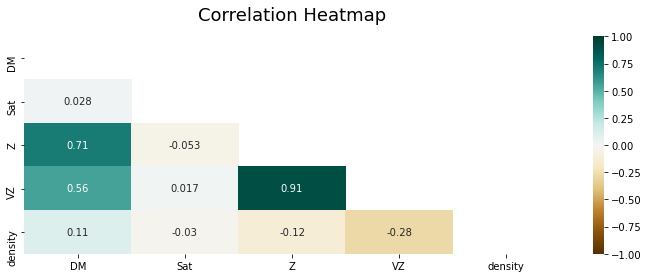

In [24]:
plt.figure(figsize=(12, 4))# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df10_red.corr(), dtype=np.bool))
heatmap = sns.heatmap(df10_red.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

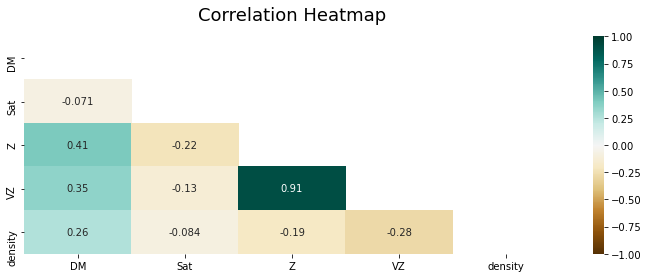

In [25]:
plt.figure(figsize=(12, 4))# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df15_red.corr(), dtype=np.bool))
heatmap = sns.heatmap(df15_red.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [20]:
def MIC_matrix(df):
    mic_results_matrix = np.zeros((len(df.columns),len(df.columns)))
    for i,var1 in enumerate(df.columns):
        for j,var2 in enumerate(df.columns):
            mine.compute_score(df[var1],df[var2])
            #mic = mine.mic()
            mic_results_matrix[i,j] = mine.mic()
    mic_results_df = pd.DataFrame(data= mic_results_matrix, index=df.columns,columns=df.columns)
    return mic_results_df

In [24]:
for lb in df10["Lookback"]:
   # lb = 3.77
    window =0.8
    df_w1 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w1.drop('Lookback', inplace=True, axis=1)
    mic_matrix = MIC_matrix(df_w1)

    fig, ax = plt.subplot_mosaic(
    [["top"],
     ["top"],
     ["center"],
     ["center"],
     ["bottom"]], figsize=(12, 10))
    mask = np.triu(np.ones_like(df_w1.corr(), dtype=np.bool))
    heatmap = sns.heatmap(df_w1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax["top"], cbar_kws={'label': 'Corr'})
    #heatmap = sns.heatmap(df15_red.corr(),  vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax["top"])
    #heatmap.set_title('Correlation', fontdict={'fontsize':12}, pad=16)

    heatmap = sns.heatmap(mic_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax["center"],  cbar_kws={'label': 'MIC'})
    #heatmap.set_title('MIC', fontdict={'fontsize':12}, pad=16)


    ax["bottom"].axvline(x =lb, ls='-', c = "black", linewidth = 2, alpha = 0.8)
    ax["bottom"].axvspan(lb - window/2, lb + window/2, alpha=0.3, color='black')
    add_satellites(ax["bottom"])
    ax["bottom"].grid()
    ax["bottom"].set_xlim(7.6,0)
    plt.savefig(f"cor_mic/correlations_15kpc/{lb:.2f}_cor.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
    plt.close()
